In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util.plot as pl

TUR不等式

$\sigma \geq 2\frac{R^2}{Var(R)^2}$

の確認

# 変更点
sample stepにパラメーターdtを追加

$x+(-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon ))dt+\sqrt{\beta_t}\sqrt{dt}$

とした。生成過程をランジュバン風に書くと

$\dot{x}=Adt+\sqrt{\beta_t}dw$

$A=-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon )$

学習ステップ係数を小さくして学習過程を見やすくした

## 平均分散の計算方法

ストラトノビッチ積を使ったのパス平均、分散

$ave_f=\sum f(x_t,t)\circ dx_t$ (V)

に加え

$ave_f=<J_f>=<f(AP-D\nabla P)>=\int dx P(x)f(x)(A(x)-Dscore(x)) =: <f*F>$ (A)

$ave_f=\int dx P(x)(f(x)A(x)+D\nabla f(x))$ (B)

を取得した。分散は(A),(B)では

$var_f:=<fDf>$

(A)では$f=A(x)-D\nabla log p(x)=A(x)-Dscore(x)$を代入してTURの等式条件を確認した


## 計算した量Rの一覧

In [2]:
p=False
funcs=[]

with open("train.py") as fp:
    ls=fp.readlines()
    for l in ls:
        if(p):
            ll=l.replace(" ","").replace("),",")").replace("\n","").replace(",","@").replace("tdot(","")
            ll=ll.replace("_f","").replace("tsum","sum").replace("tmean","mean")
            ll=ll.replace("xd","dx").replace("xe","x").replace("xe","x^").replace(")","")
            funcs.append(ll)            
        if("fs=[" in l and "dfs" not in l):
            p=True
        elif("]" in l):
            p=False
            
for f in funcs:
    print(f)

tflatten(torch.ones(x.shape.cuda(
xf@
-xf2@
x@
x2@
F
]


In [3]:
TUR_log=pd.read_csv("TUR_log_skip20sample50epoch5_linear_lr0.0001_DDPM.csv",index_col=False)
TUR_log

epoch  gen_step     TUR_lhs  (Ai-D*score)^2       score        Ai  \
0        0         0   66.849902        0.014105   -6.977534  0.317948   
1        0         1   62.843174        0.011288   19.760055 -0.156577   
2        0         2   60.845635        0.011362   17.167911 -0.074082   
3        0         3   59.504756        0.011235  -39.395535  0.990594   
4        0         4   59.111162        0.009408    4.418850  0.257632   
..     ...       ...         ...             ...         ...       ...   
120      4        20  117.850703        0.004598  -31.661006  0.836719   
121      4        21  129.522402        0.004731 -107.787598  1.914232   
122      4        22  183.552441        0.004930  -51.955684  1.083403   
123      4        23  247.031738        0.004417 -100.967559  1.803229   
124      4        24  427.409063        0.004476 -124.276016  2.164443   

            D    mean.0  meanA(F).0  meanB(df).0  ...  rhsB(df).4    mean.5  \
0    0.010000  0.441318    0.118155     0.122365  ...    0.006142 -0.004595   
1    0.009601  1.022996   -0.201578    -0.020275  ...    0.004639 -0.001941   
2    0.009202 -0.188408   -0.795873    -0.297834  ...    0.003214  0.004576   
3    0.008804  0.442222   -0.159042     0.002766  ...    0.072961  0.005261   
4    0.008405  0.197317    0.521877     0.361363  ...    0.008325 -0.005691   
..        ...       ...         ...          ...  ...         ...       ...   
120  0.002024  0.677461    0.720762     0.603088  ...    0.188588  0.068394   
121  0.001625  0.810315    0.940498     0.800763  ...    1.055576  0.074526   
122  0.001226  0.568504    0.699583     0.624696  ...    0.319106  0.084188   
123  0.000828  0.920959    1.127388     1.030282  ...    1.765332  0.079009   
124  0.000429  0.763779    0.943309     0.899770  ...    0.084072  0.087507   

     meanA(F).5  meanB(df).5     var.5    varD.5       rhs.5   rhsA(F).5  \
0      0.331425     0.169349  0.003067  0.003314    0.013768   66.284981   
1      0.323027     0.162316  0.003714  0.003101    0.002029   67.288956   
2      0.284832     0.137920  0.002490  0.002621    0.016822   61.903770   
3      0.261481     0.132071  0.001609  0.002302    0.034405   59.403088   
4      0.251879     0.133245  0.001943  0.002117    0.033343   59.936813   
..          ...          ...       ...       ...         ...         ...   
120    0.118227     0.095981  0.000205  0.000239   45.606457  116.822456   
121    0.104385     0.088438  0.000210  0.000170   52.862141  128.454193   
122    0.116138     0.102027  0.000211  0.000142   67.244835  189.387848   
123    0.098285     0.090411  0.000118  0.000081  105.724045  237.501587   
124    0.097437     0.093181  0.000076  0.000042  200.708023  454.402893   

     rhsB(df).5  Unnamed: 55  
0     17.306599          NaN  
1     16.989672          NaN  
2     14.514318          NaN  
3     15.154500          NaN  
4     16.773037          NaN  
..          ...          ...  
120   76.995476          NaN  
121   92.204140          NaN  
122  146.161377          NaN  
123  200.971497          NaN  
124  415.571686          NaN  

[125 rows x 56 columns]

In [4]:
epochs=4
generate_num=25

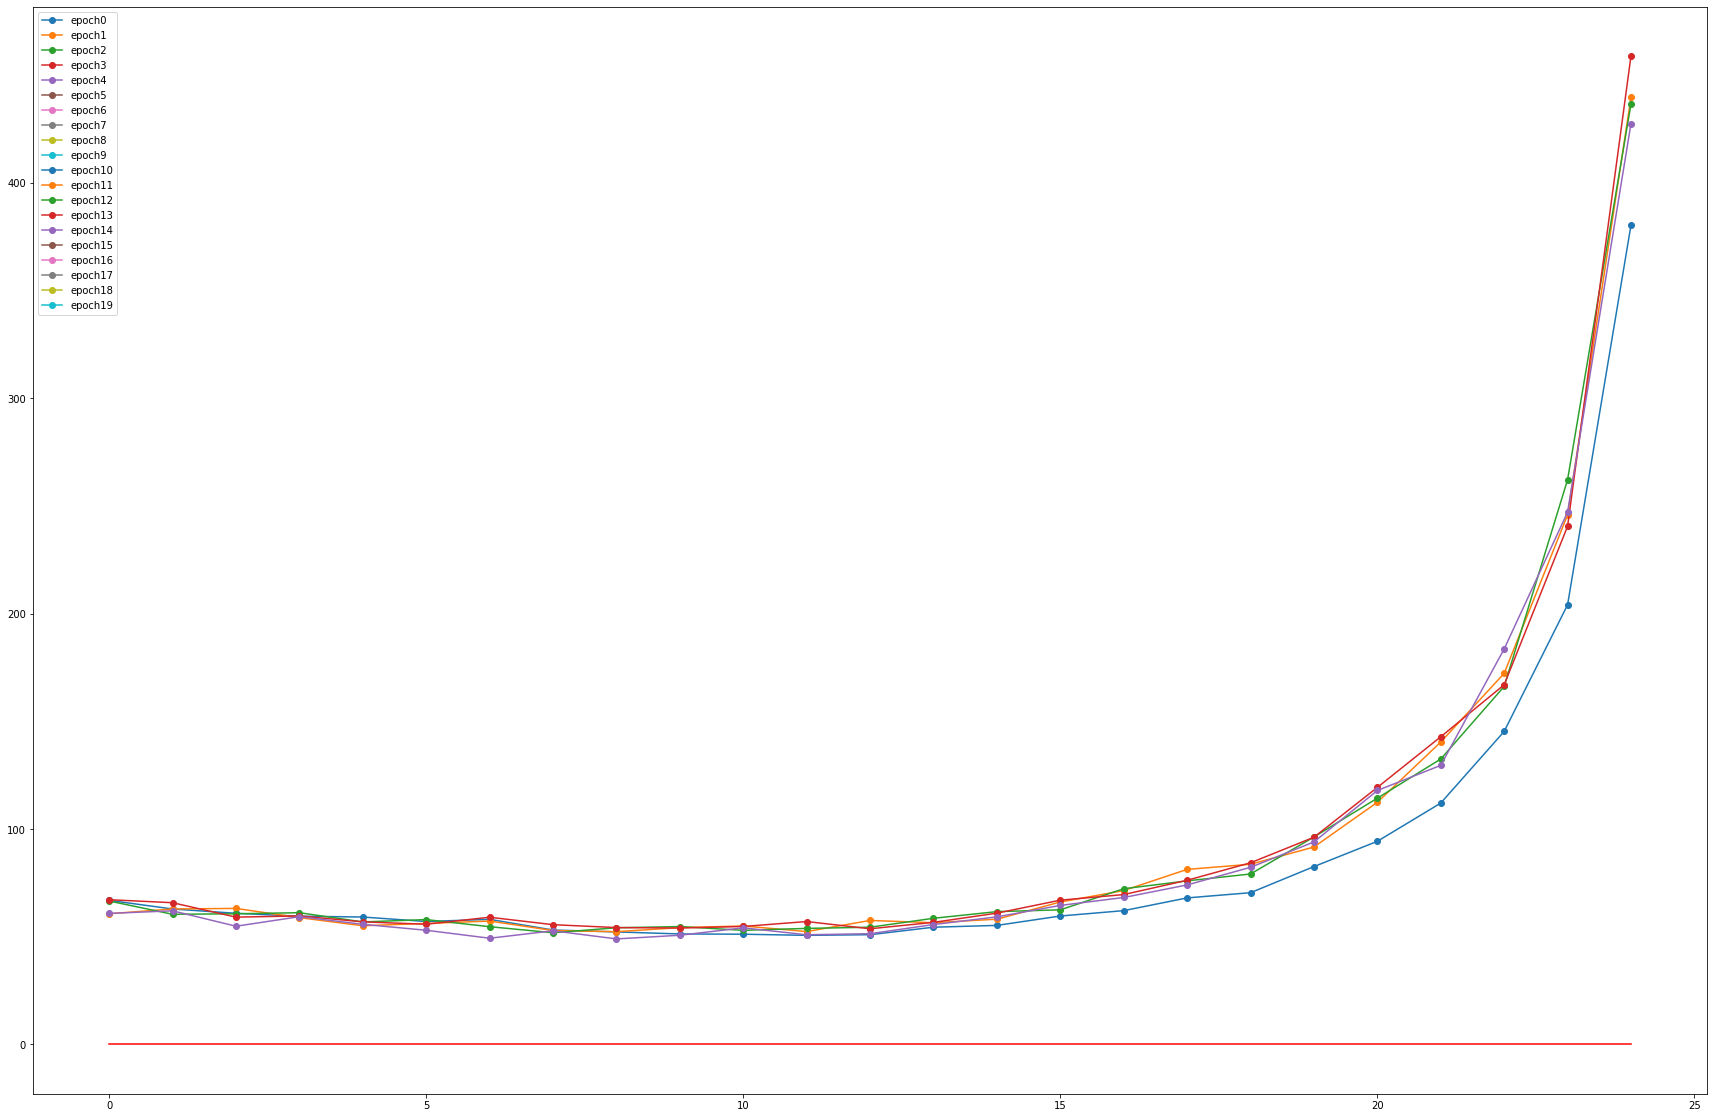

In [5]:
pl.plot_generates(TUR_log["TUR_lhs"],generate_num=generate_num)

## σ/(2ave^2/var)

0:tflatten(torch.ones(x.shape.cuda(


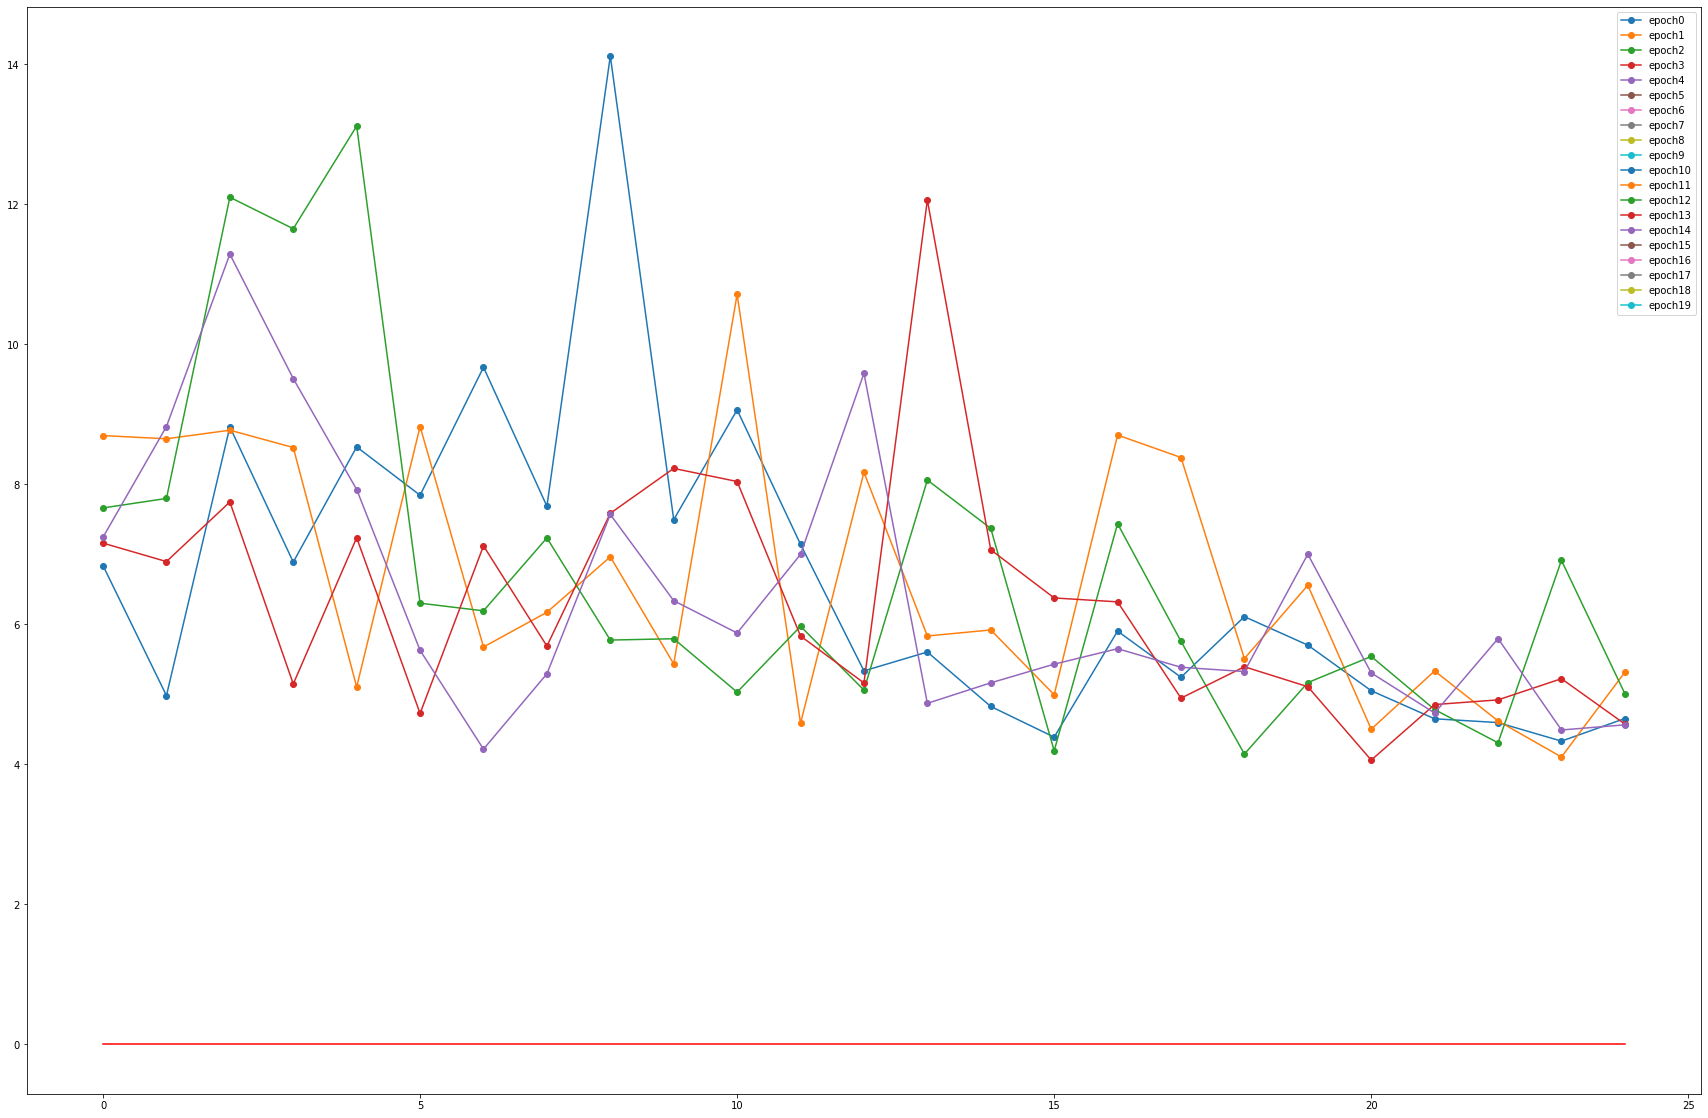

1:xf@


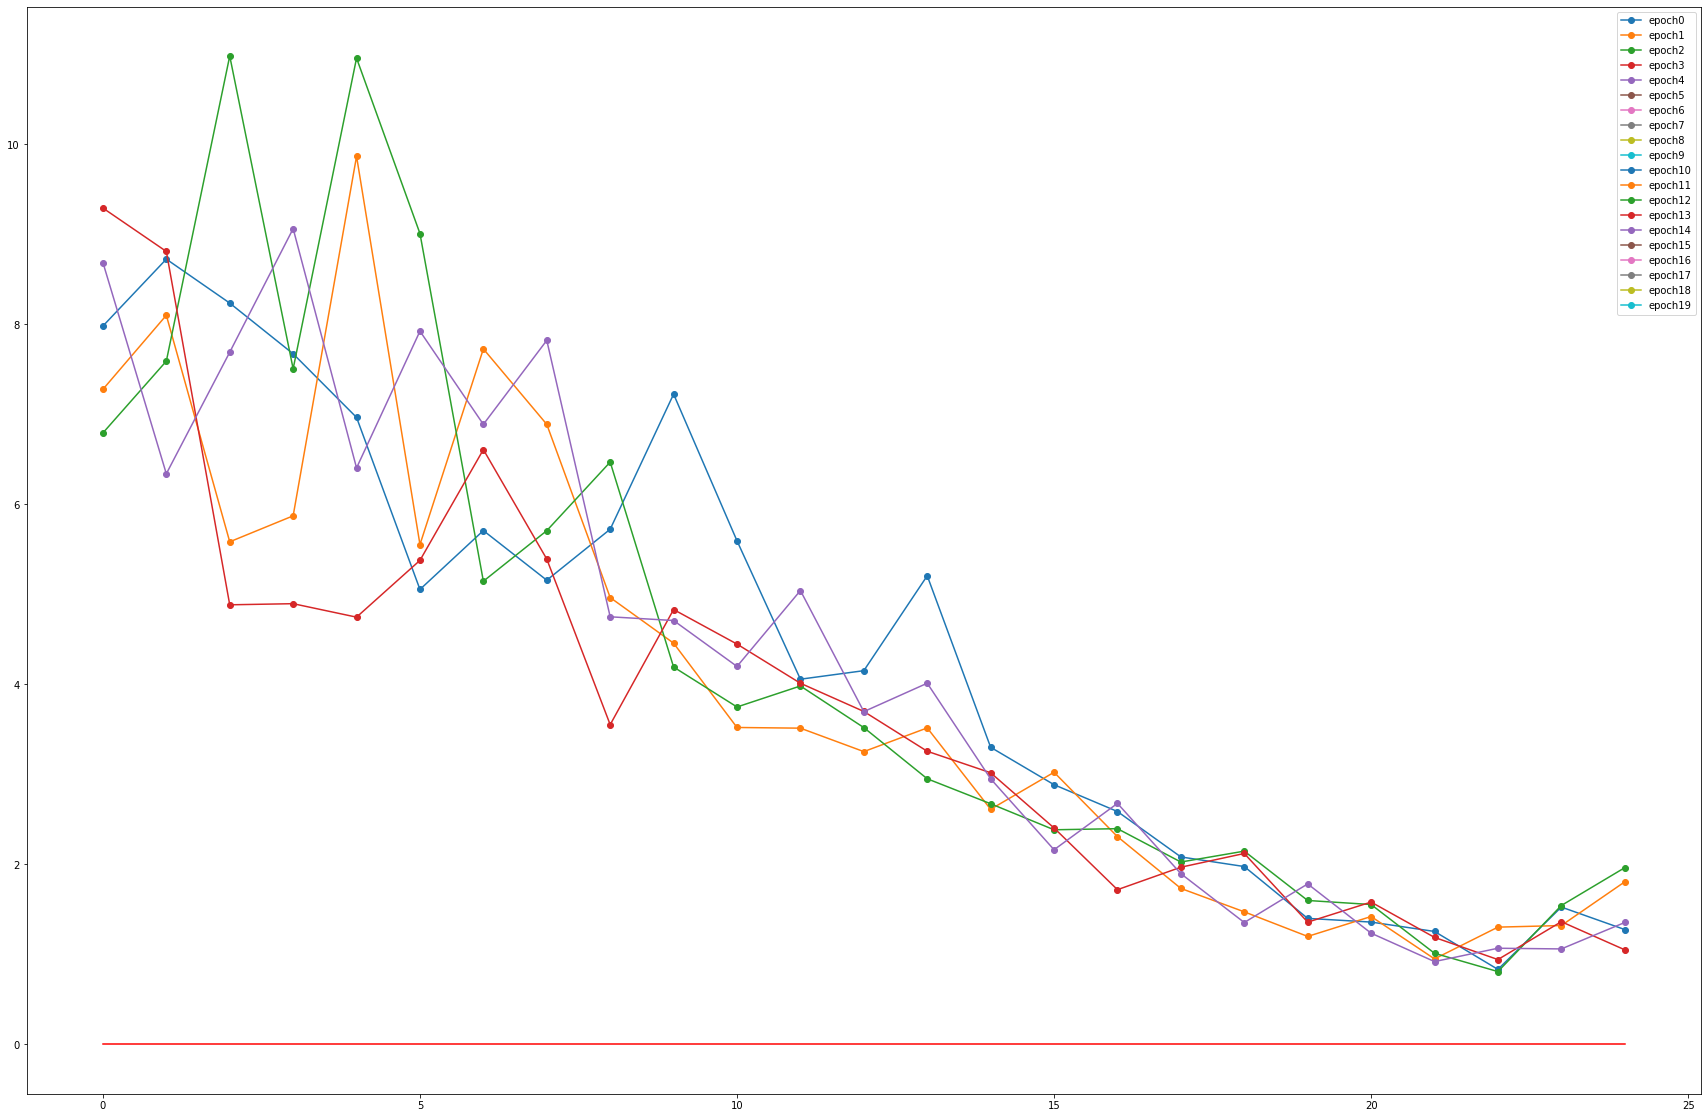

2:-xf2@


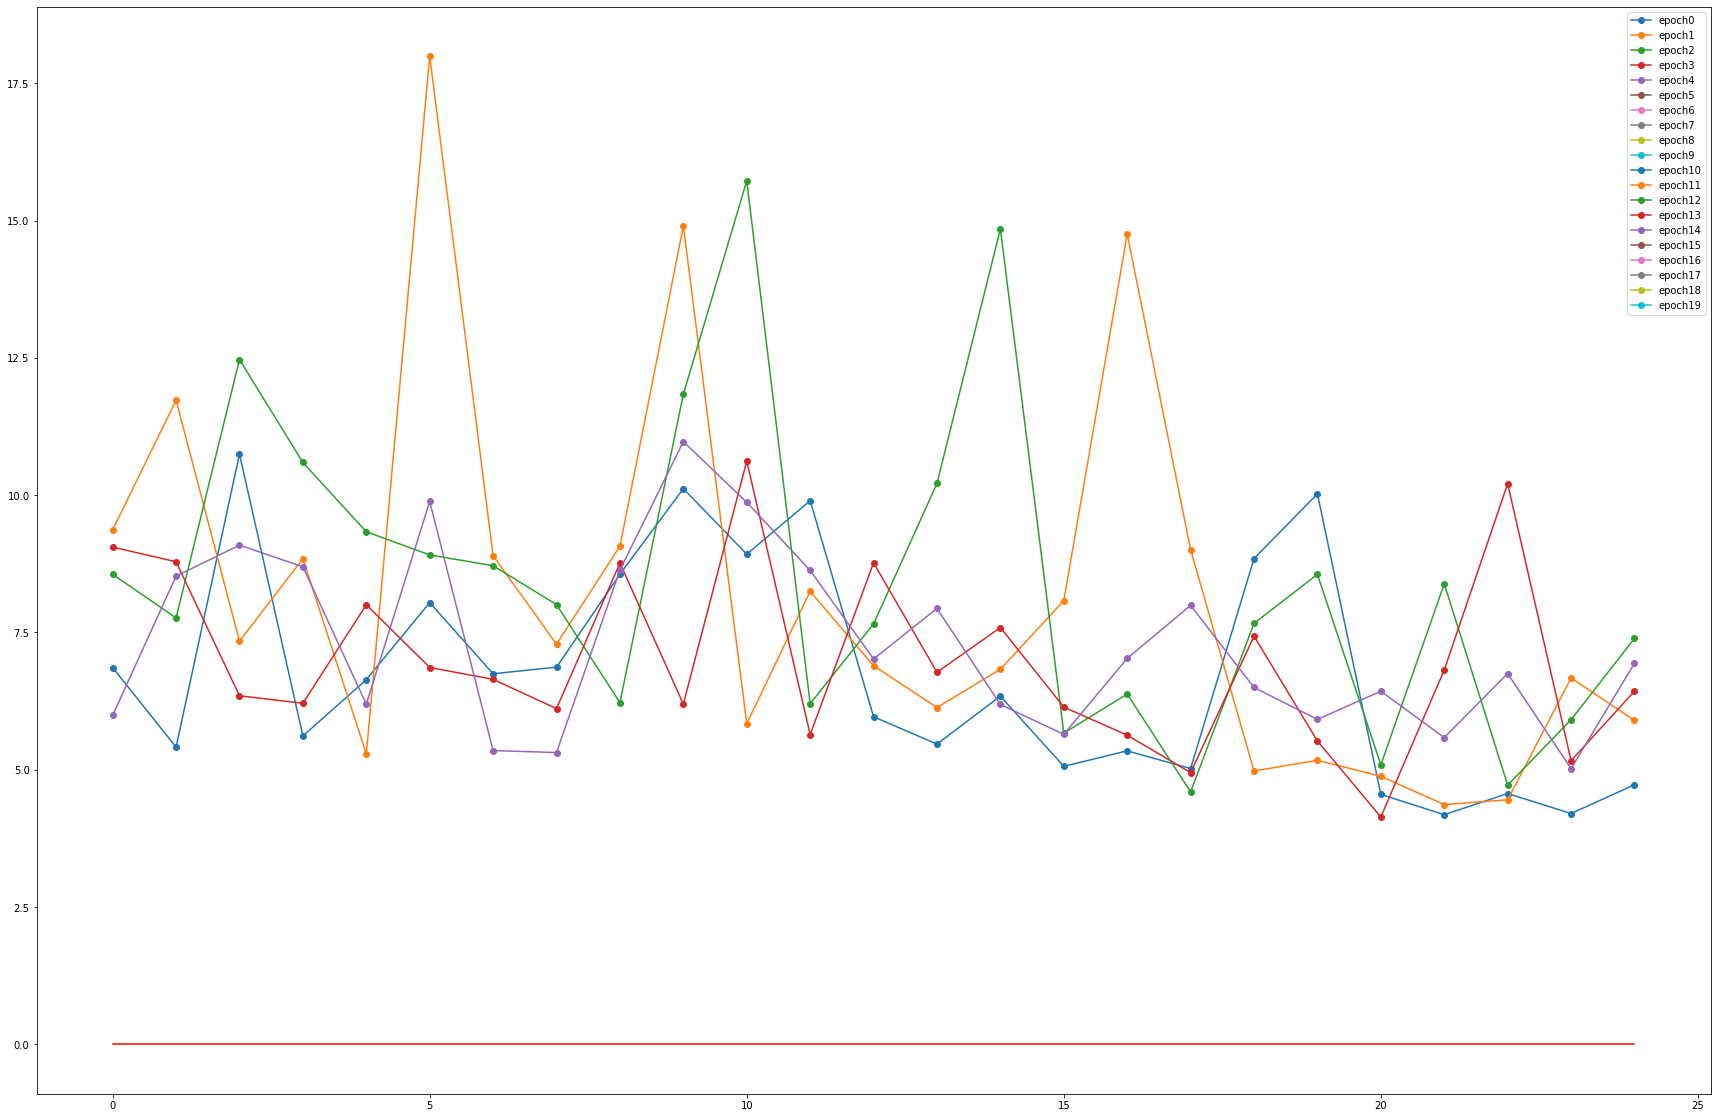

3:x@


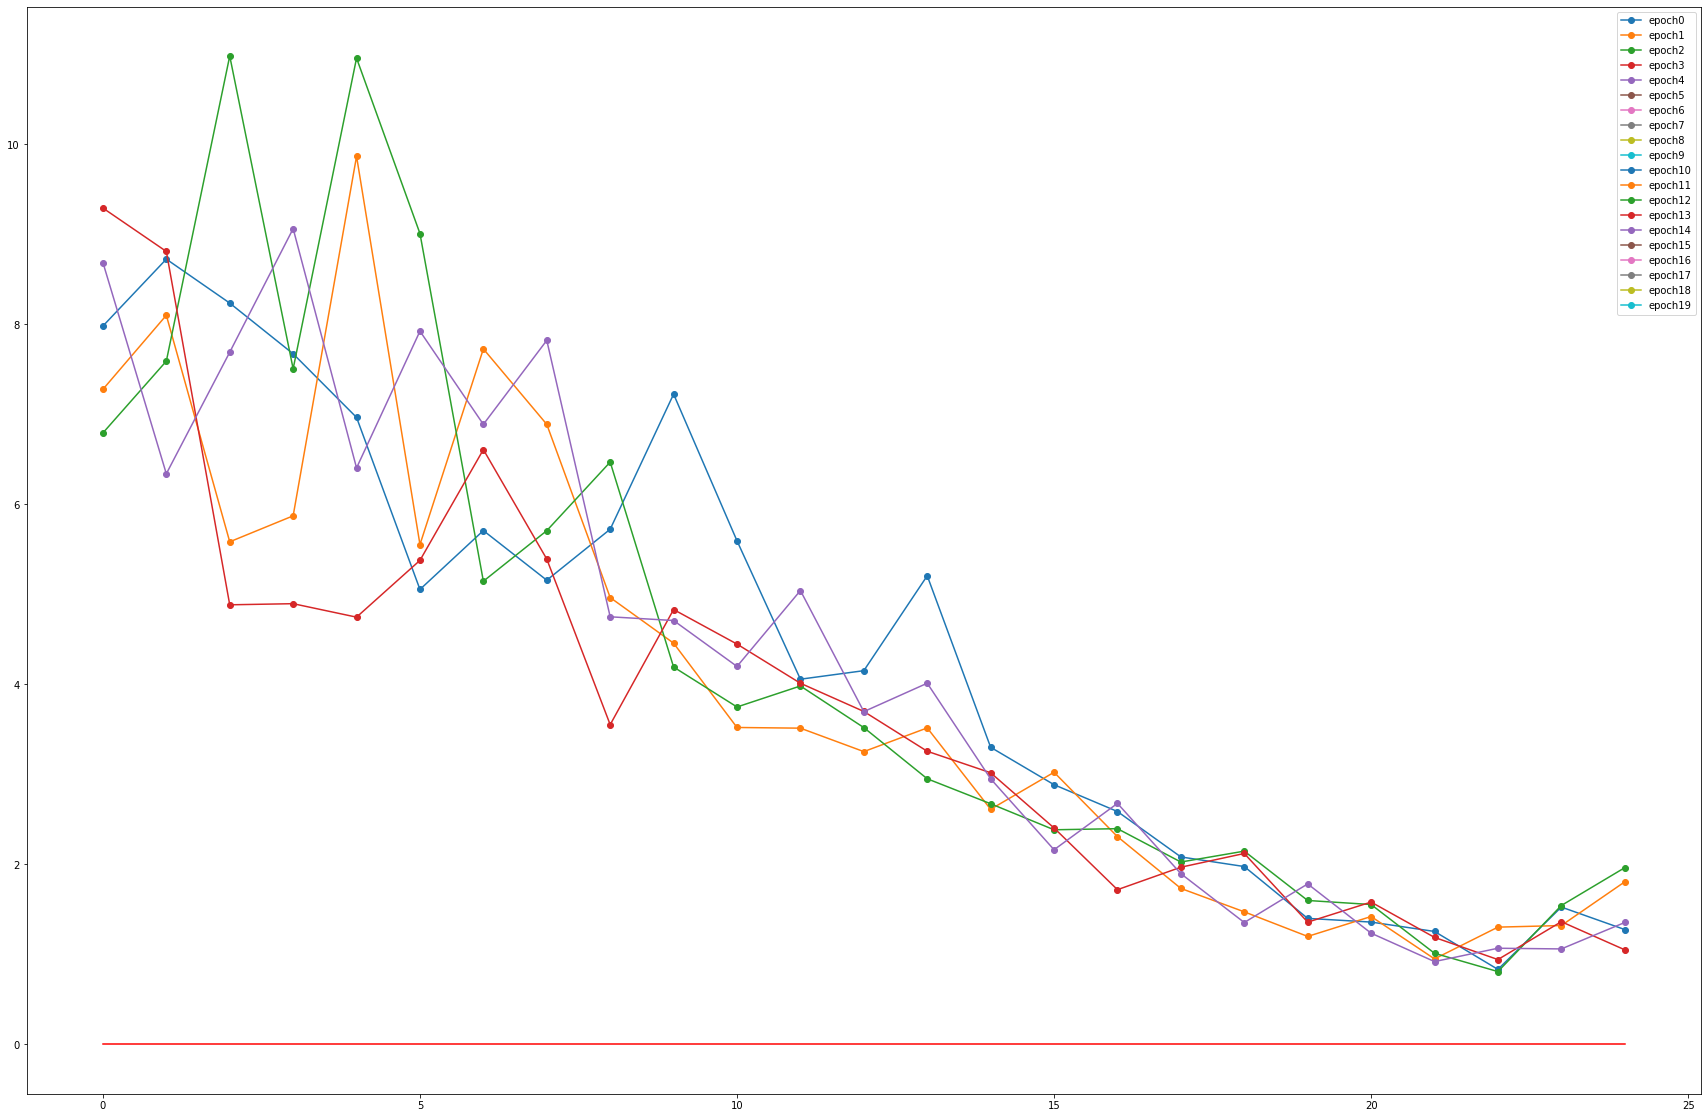

4:x2@


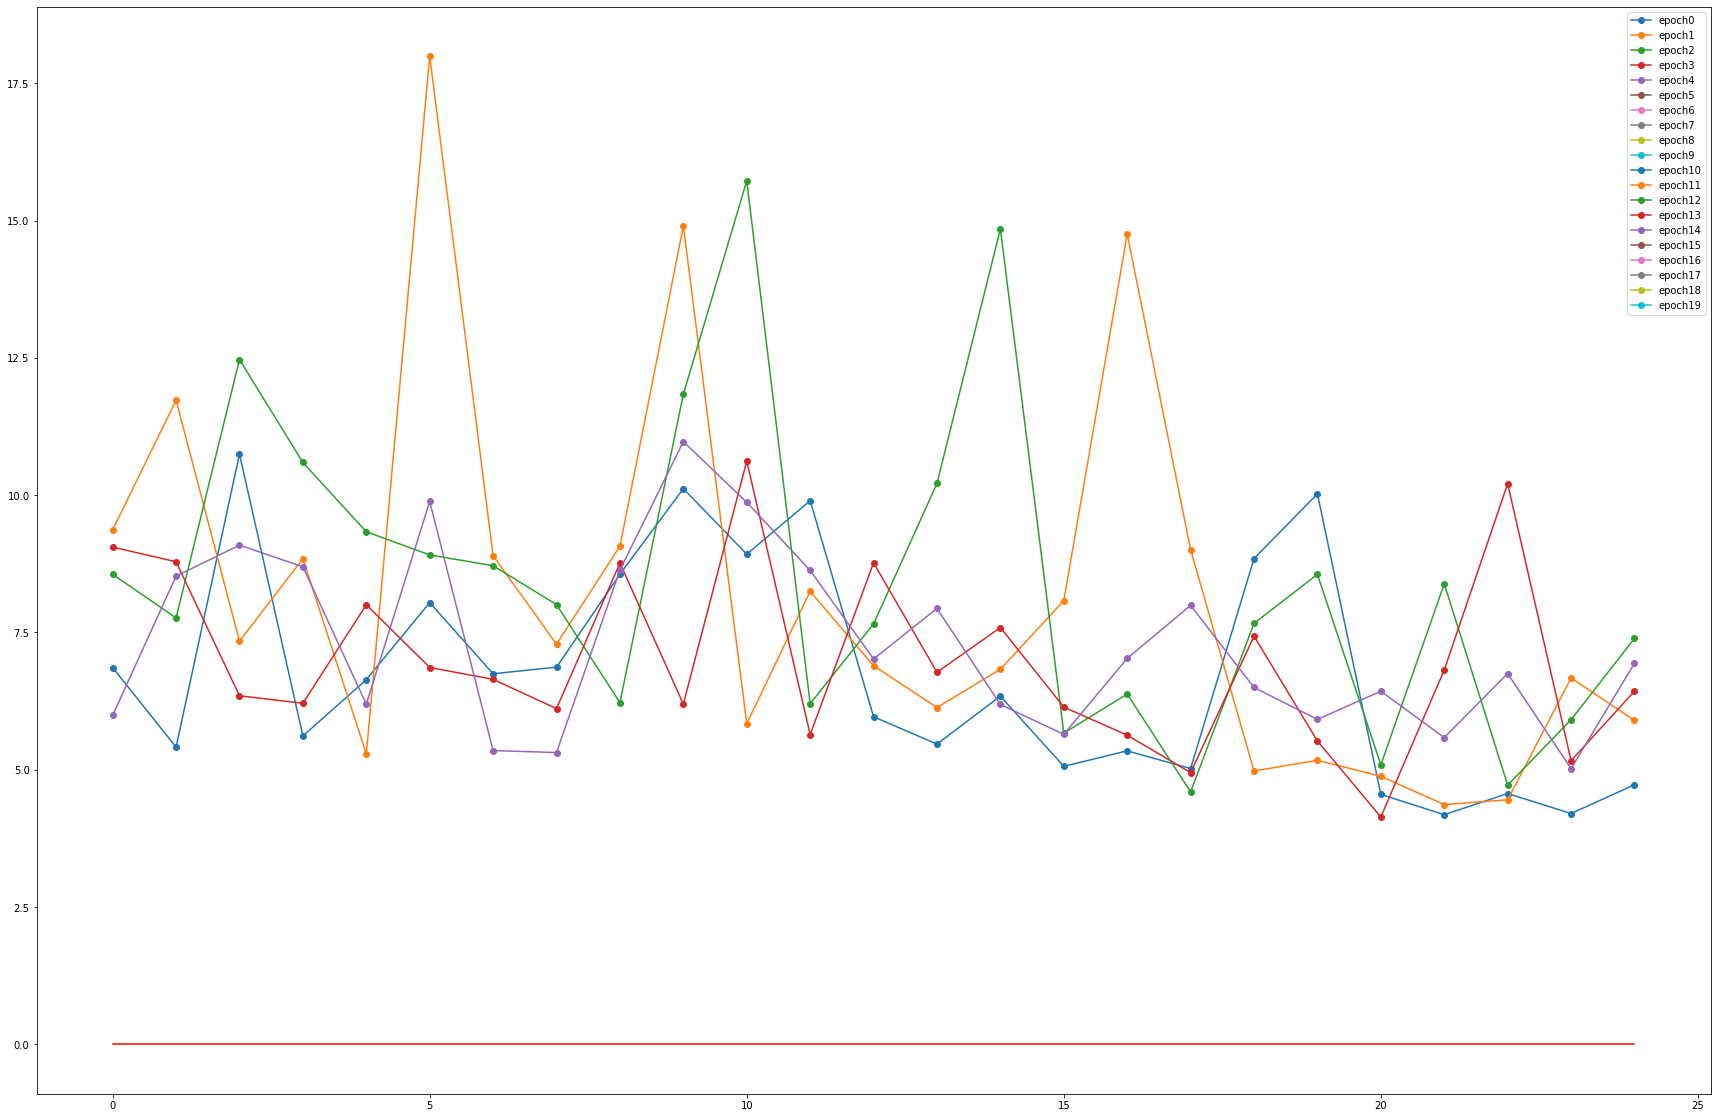

5:F


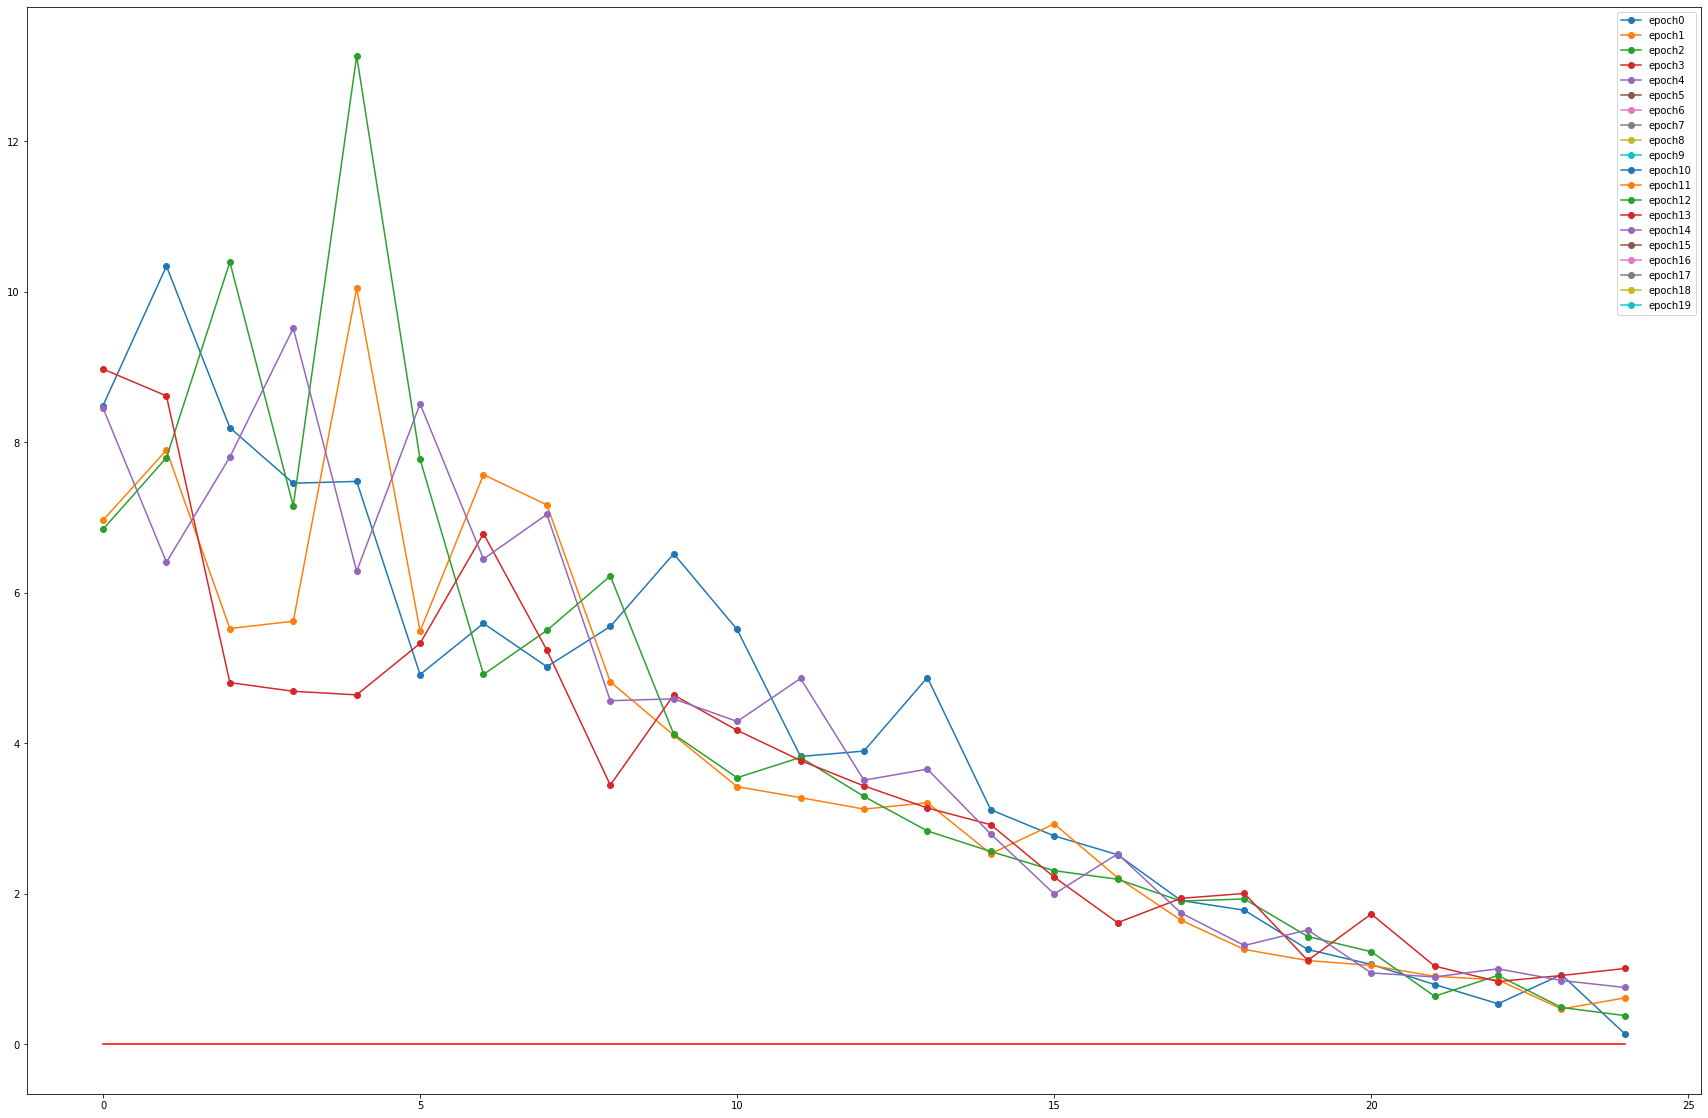

In [6]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhs."+str(i)],generate_num=generate_num)
    plt.show()

0:tflatten(torch.ones(x.shape.cuda(


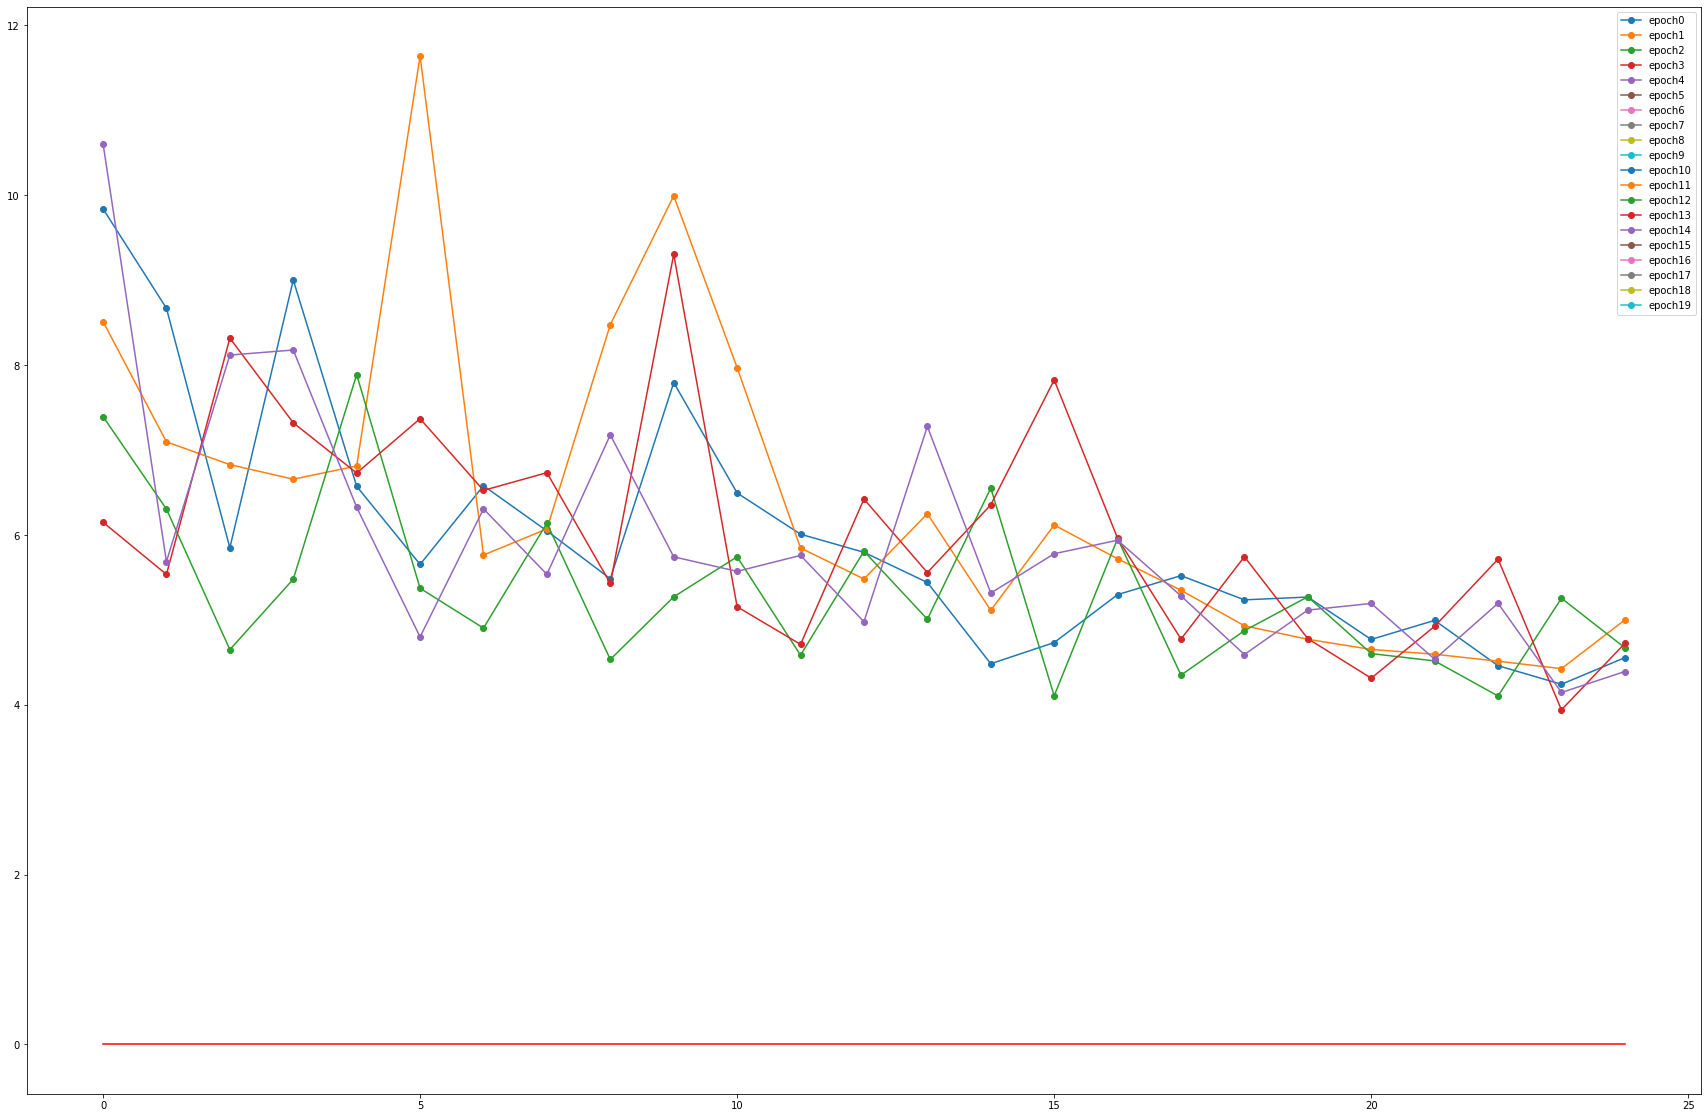

1:xf@


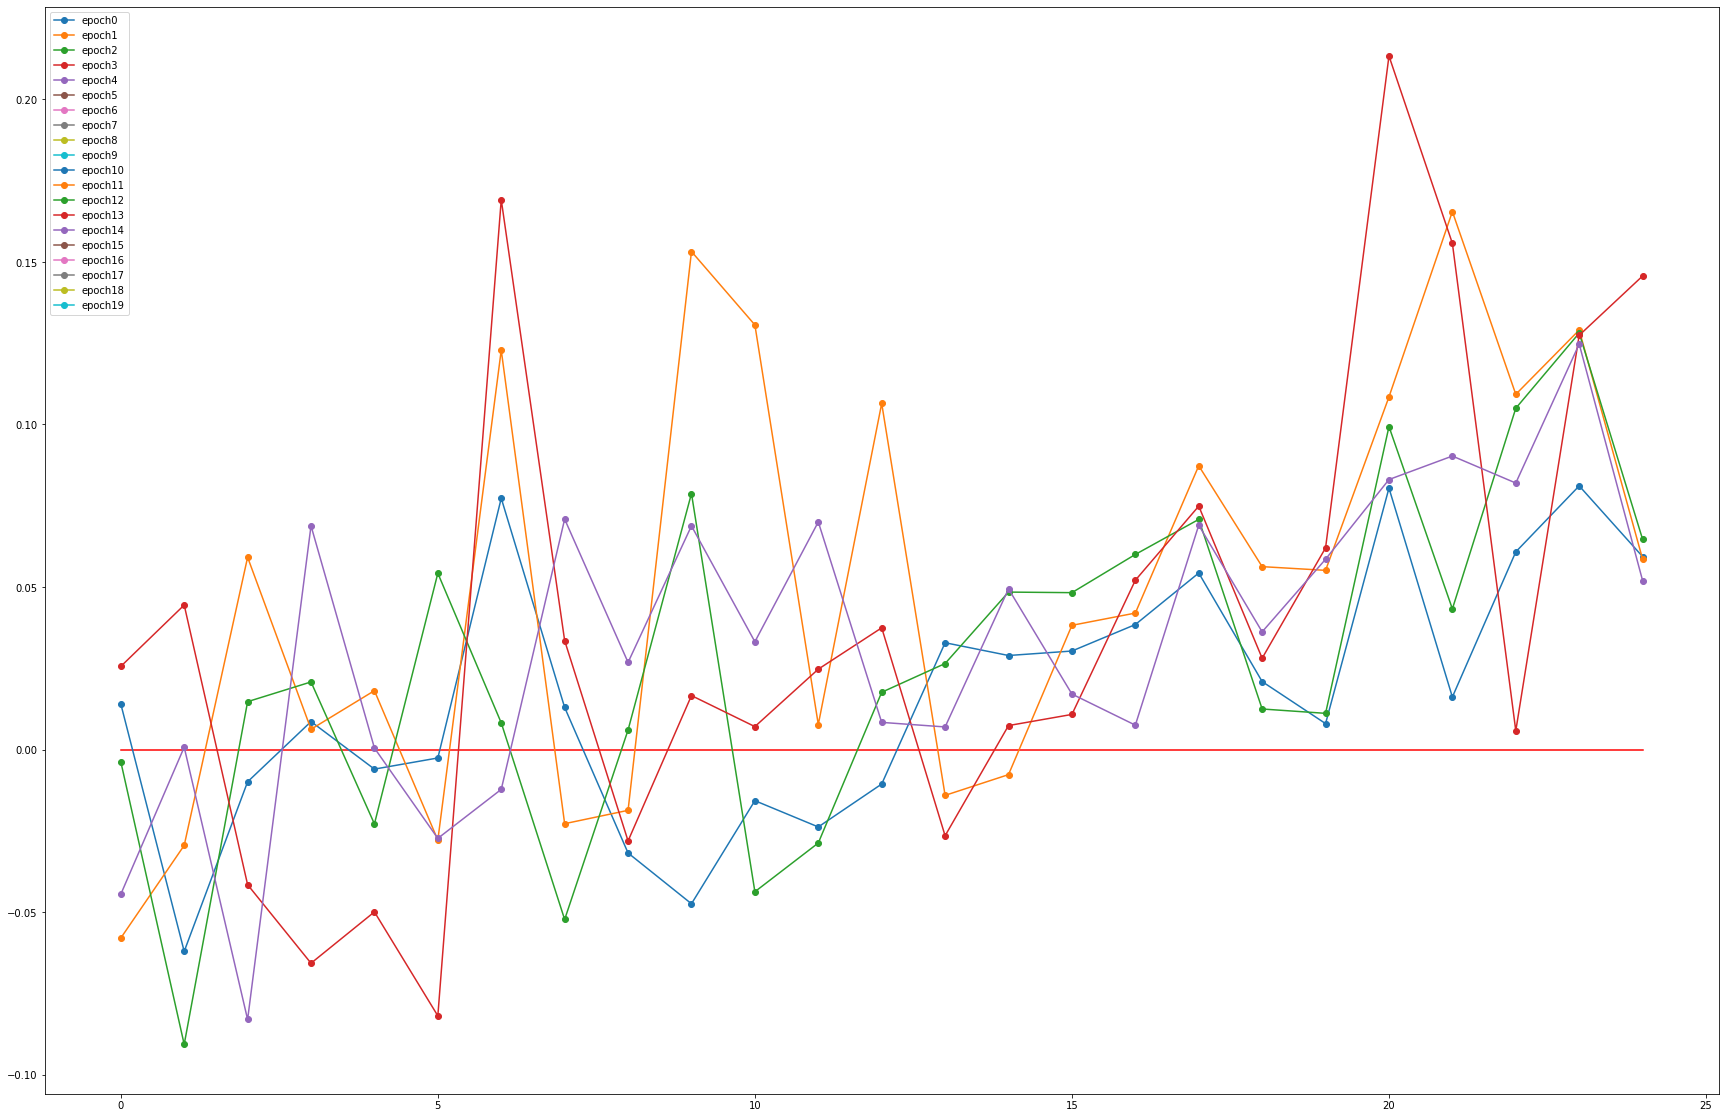

2:-xf2@


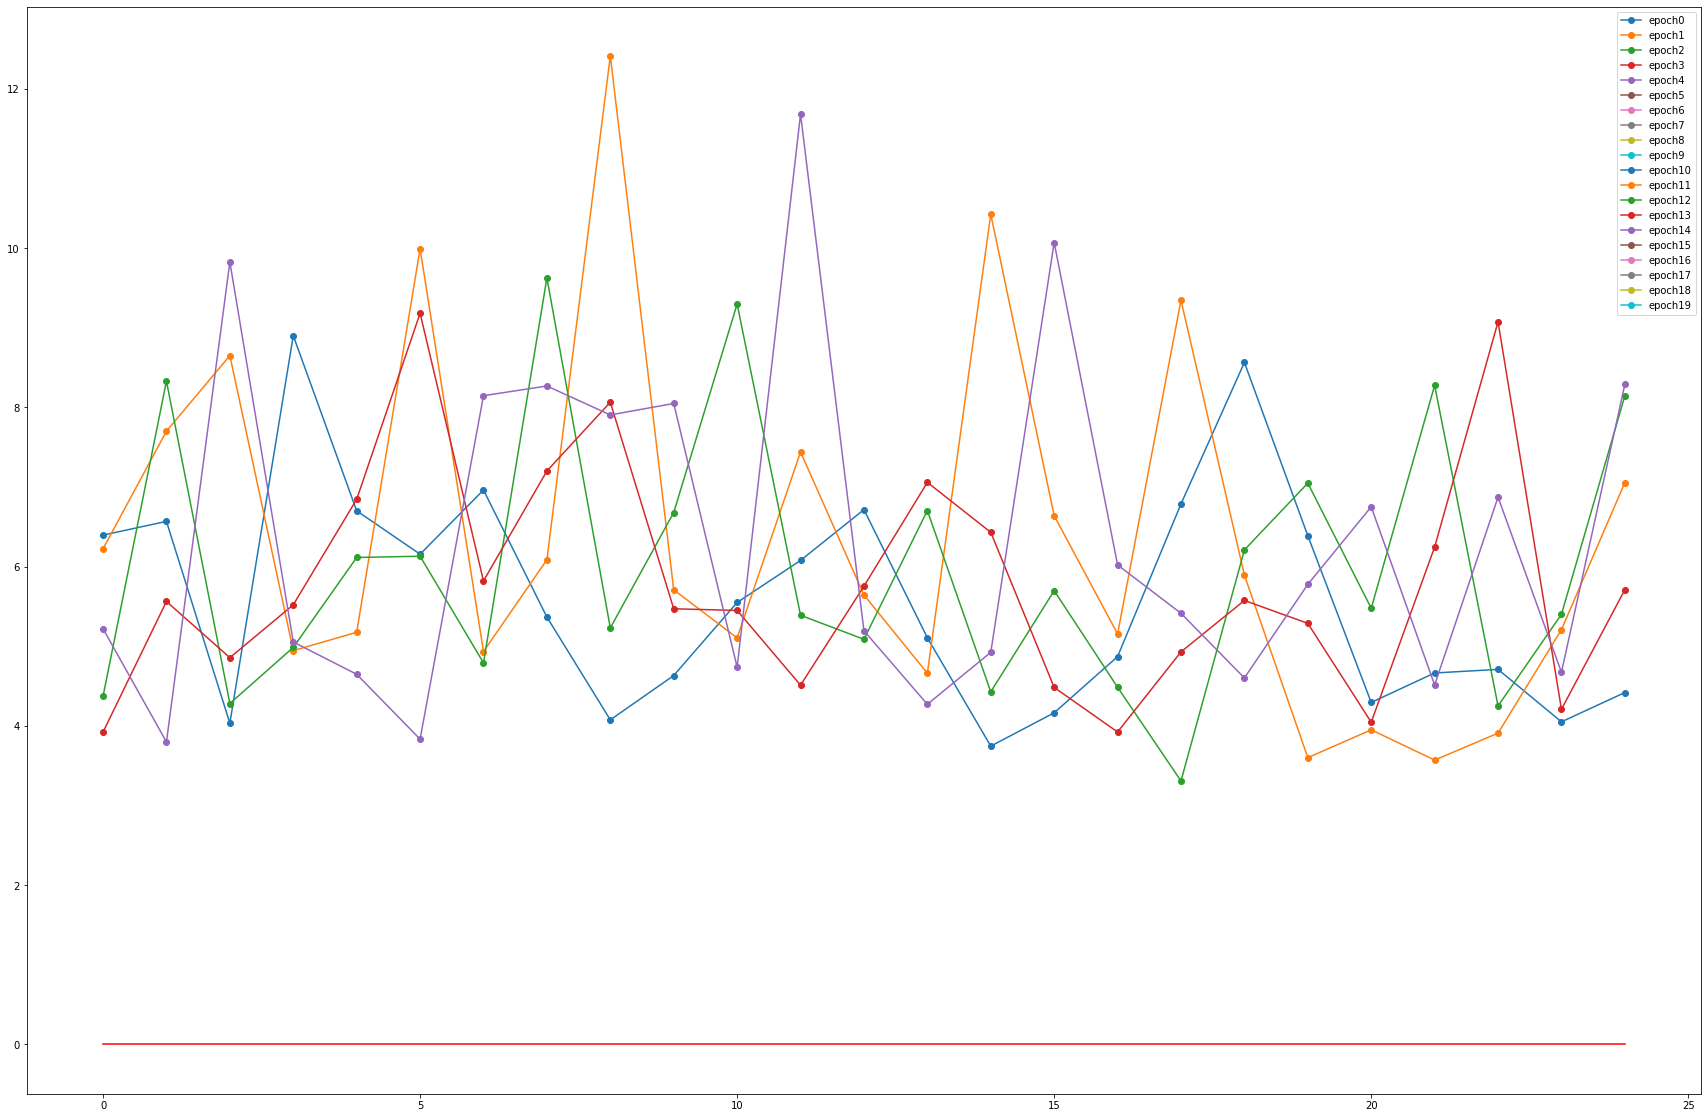

3:x@


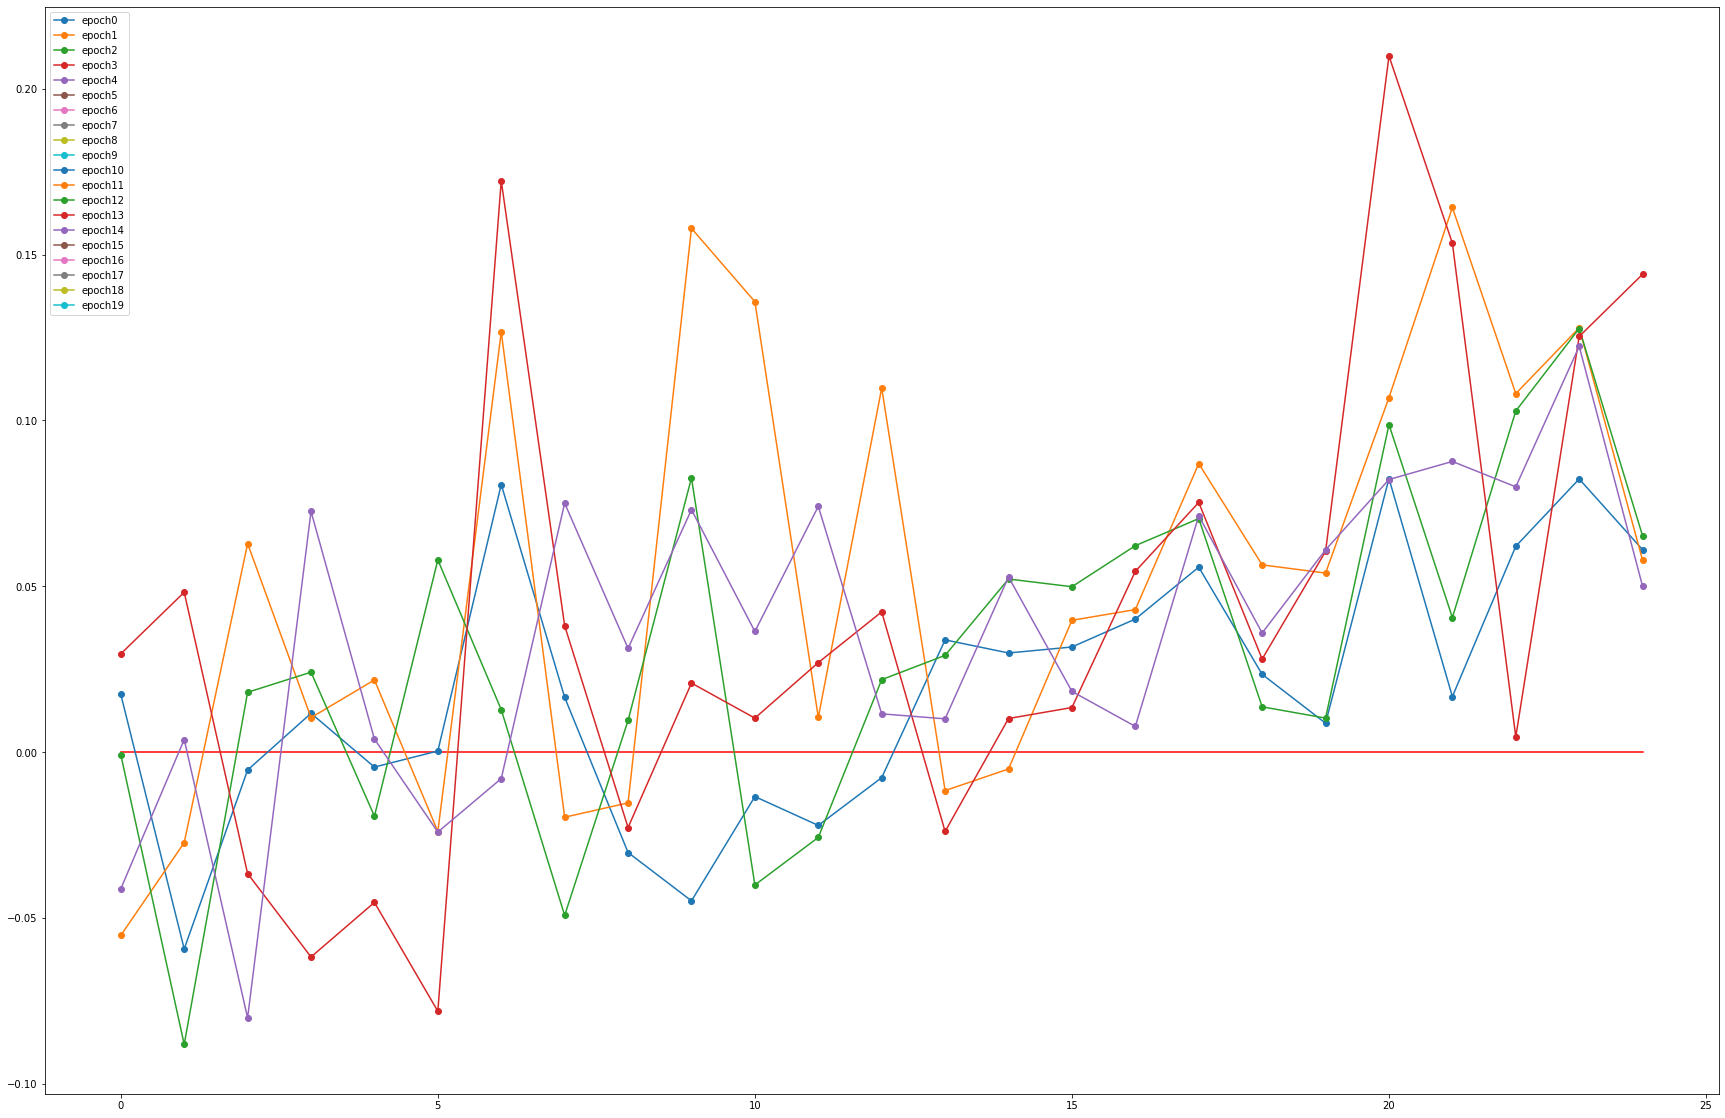

4:x2@


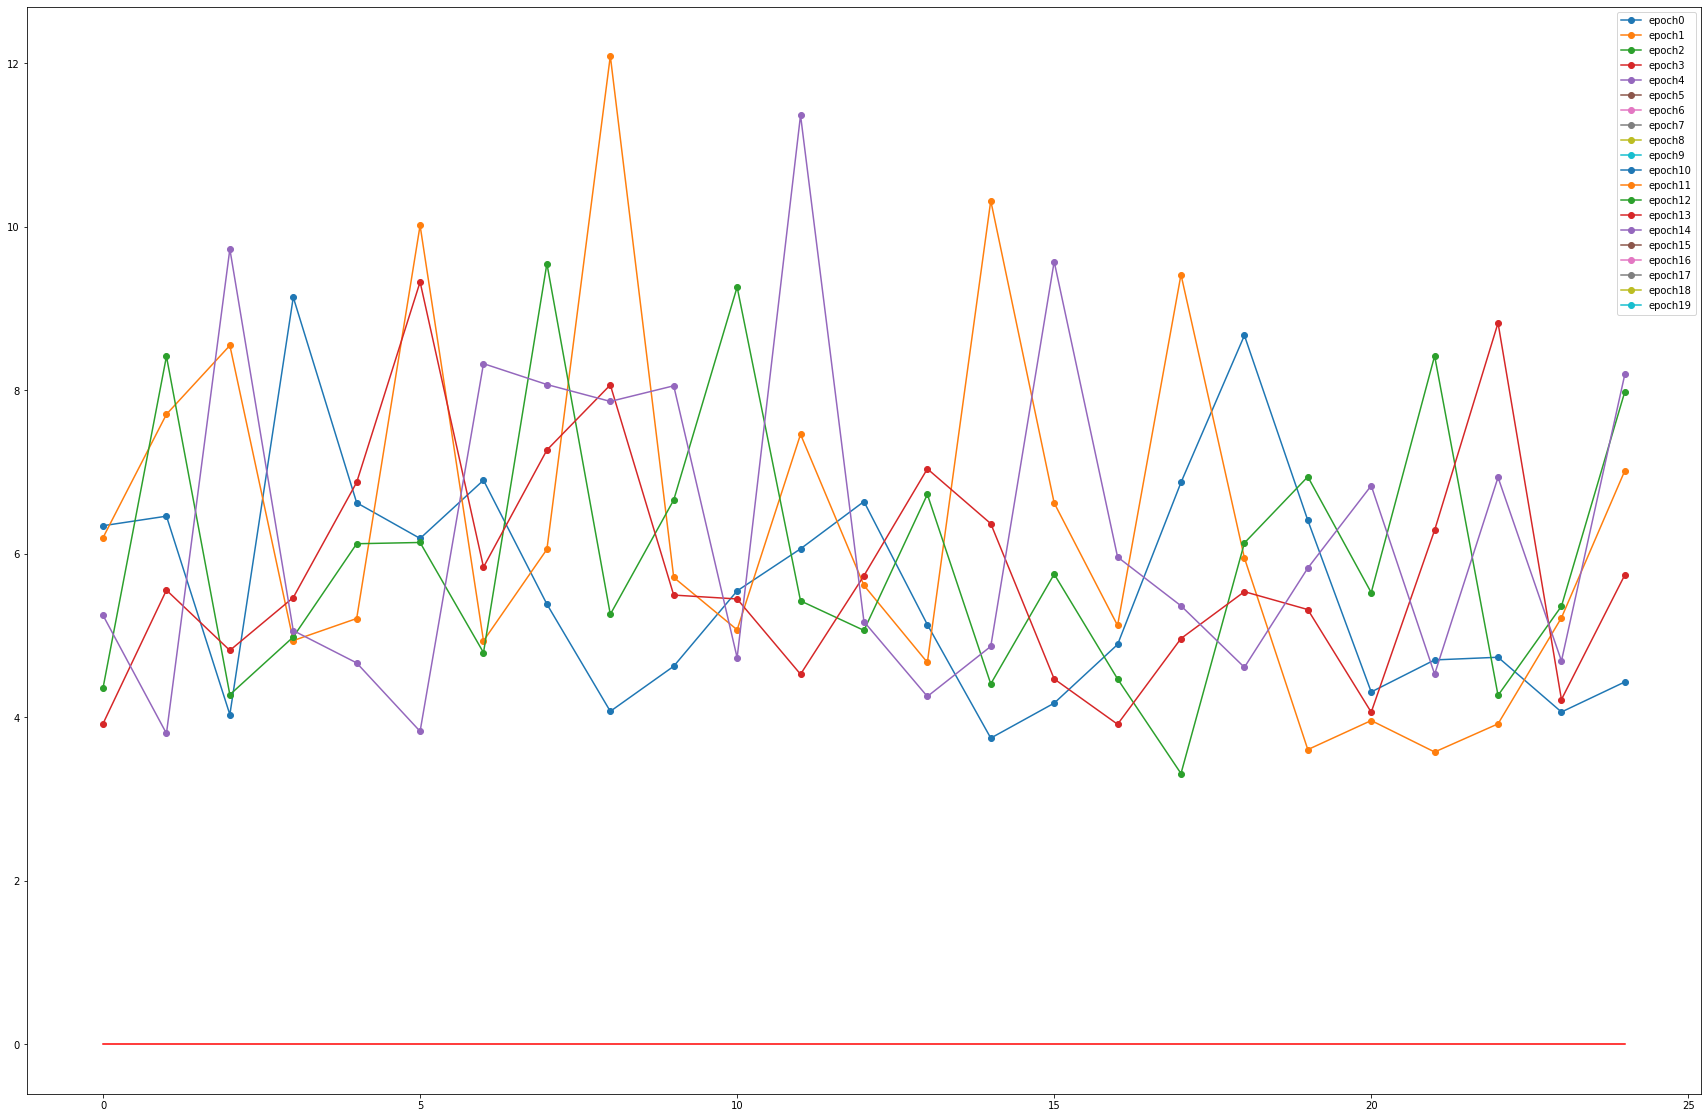

5:F


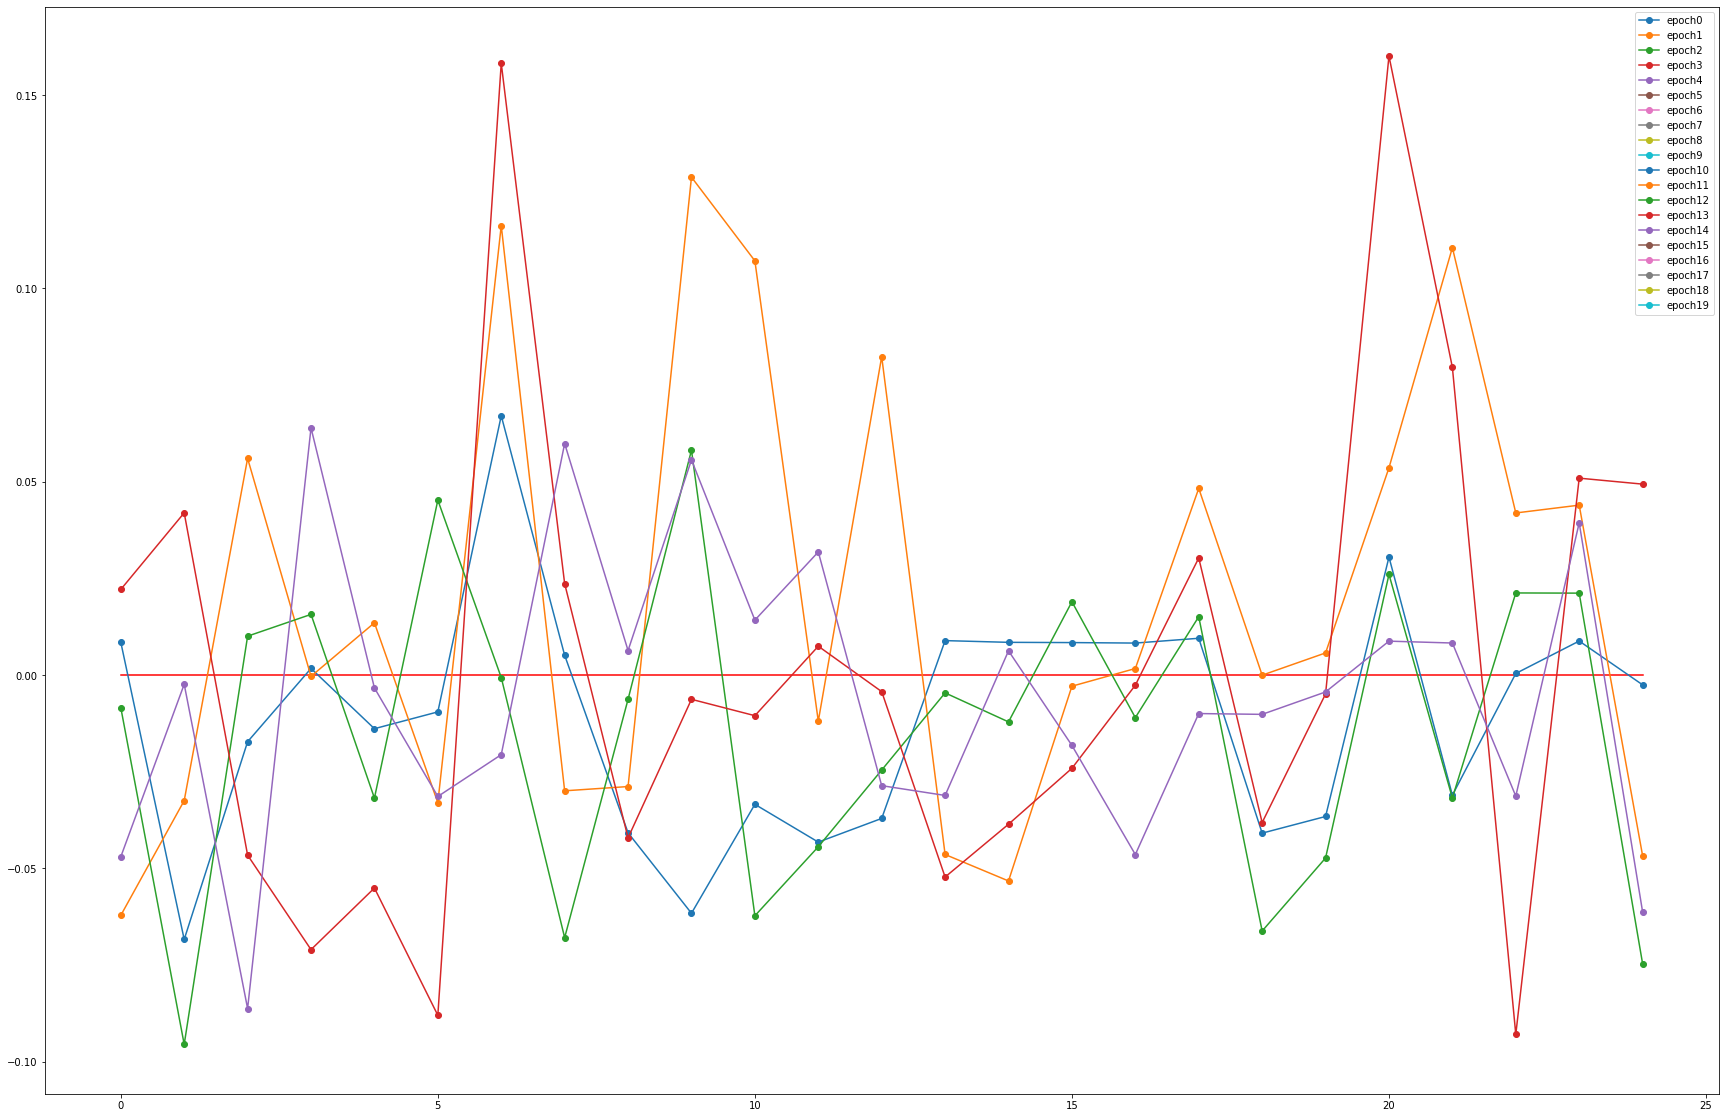

In [7]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

# 異なるサンプル手法A,B,Vの比較

## V/A

0:tflatten(torch.ones(x.shape.cuda(


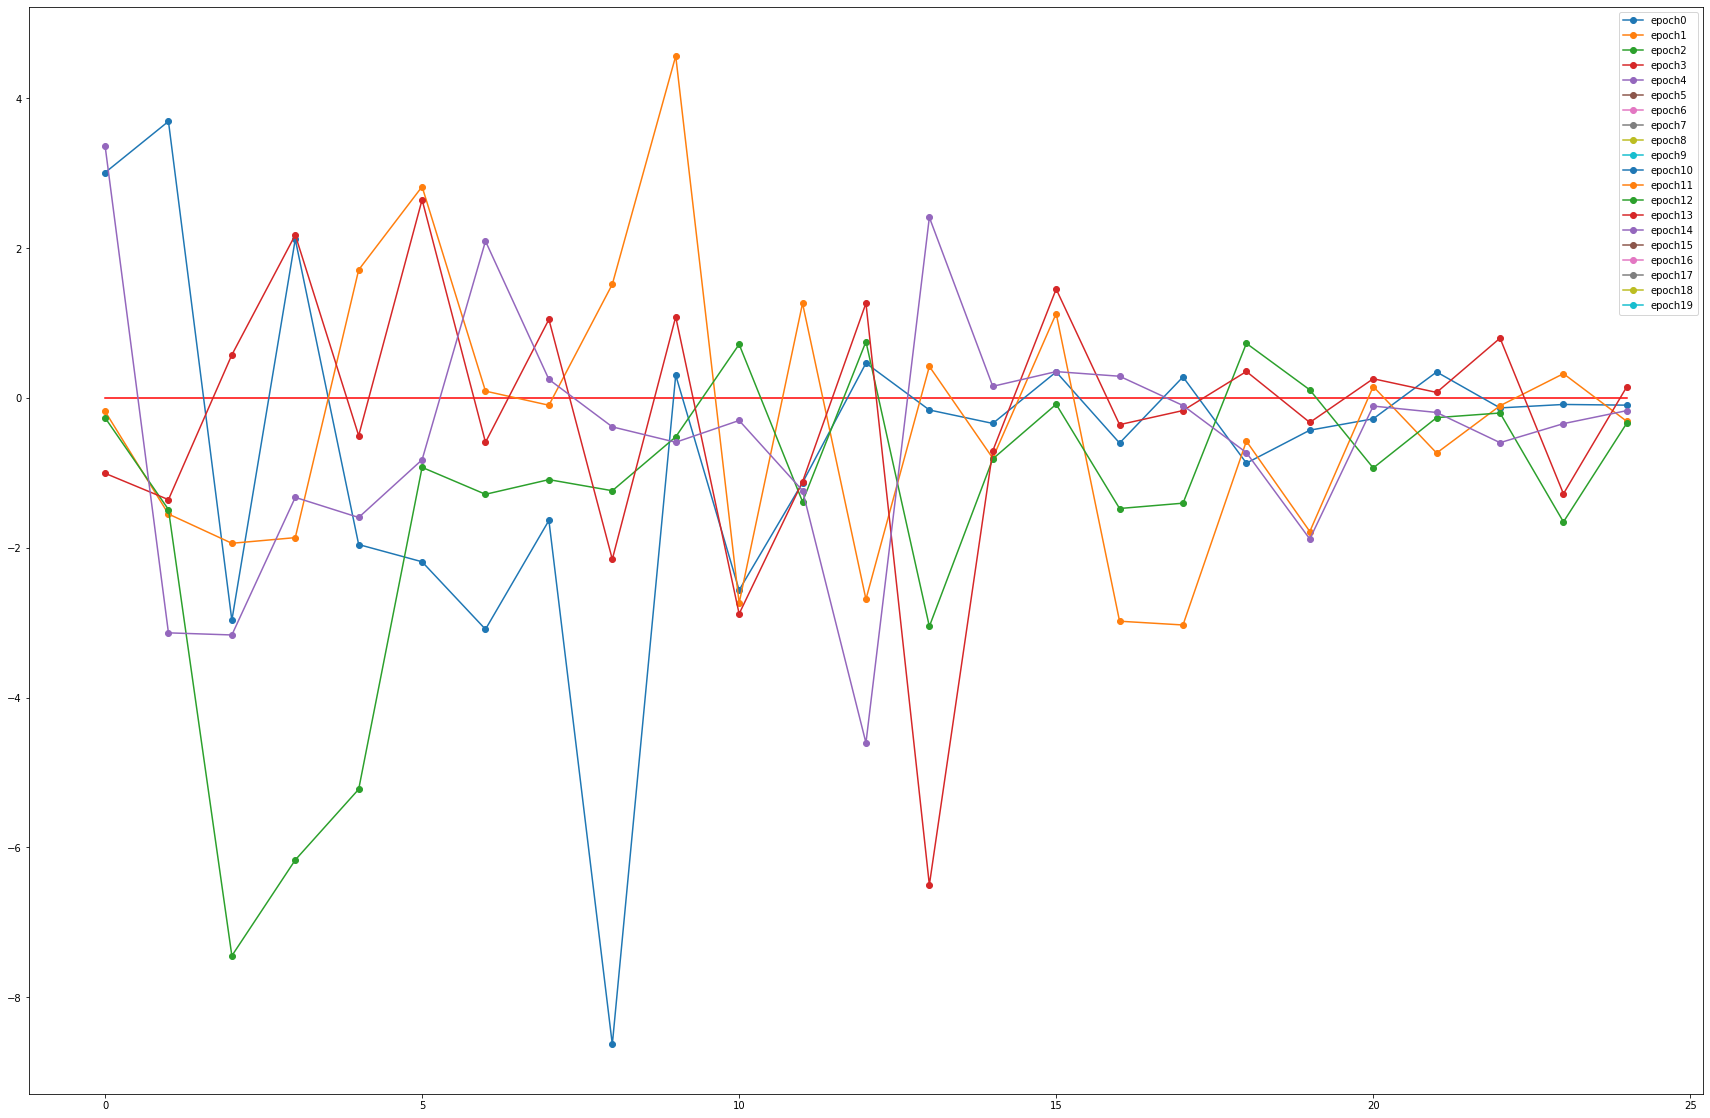

1:xf@


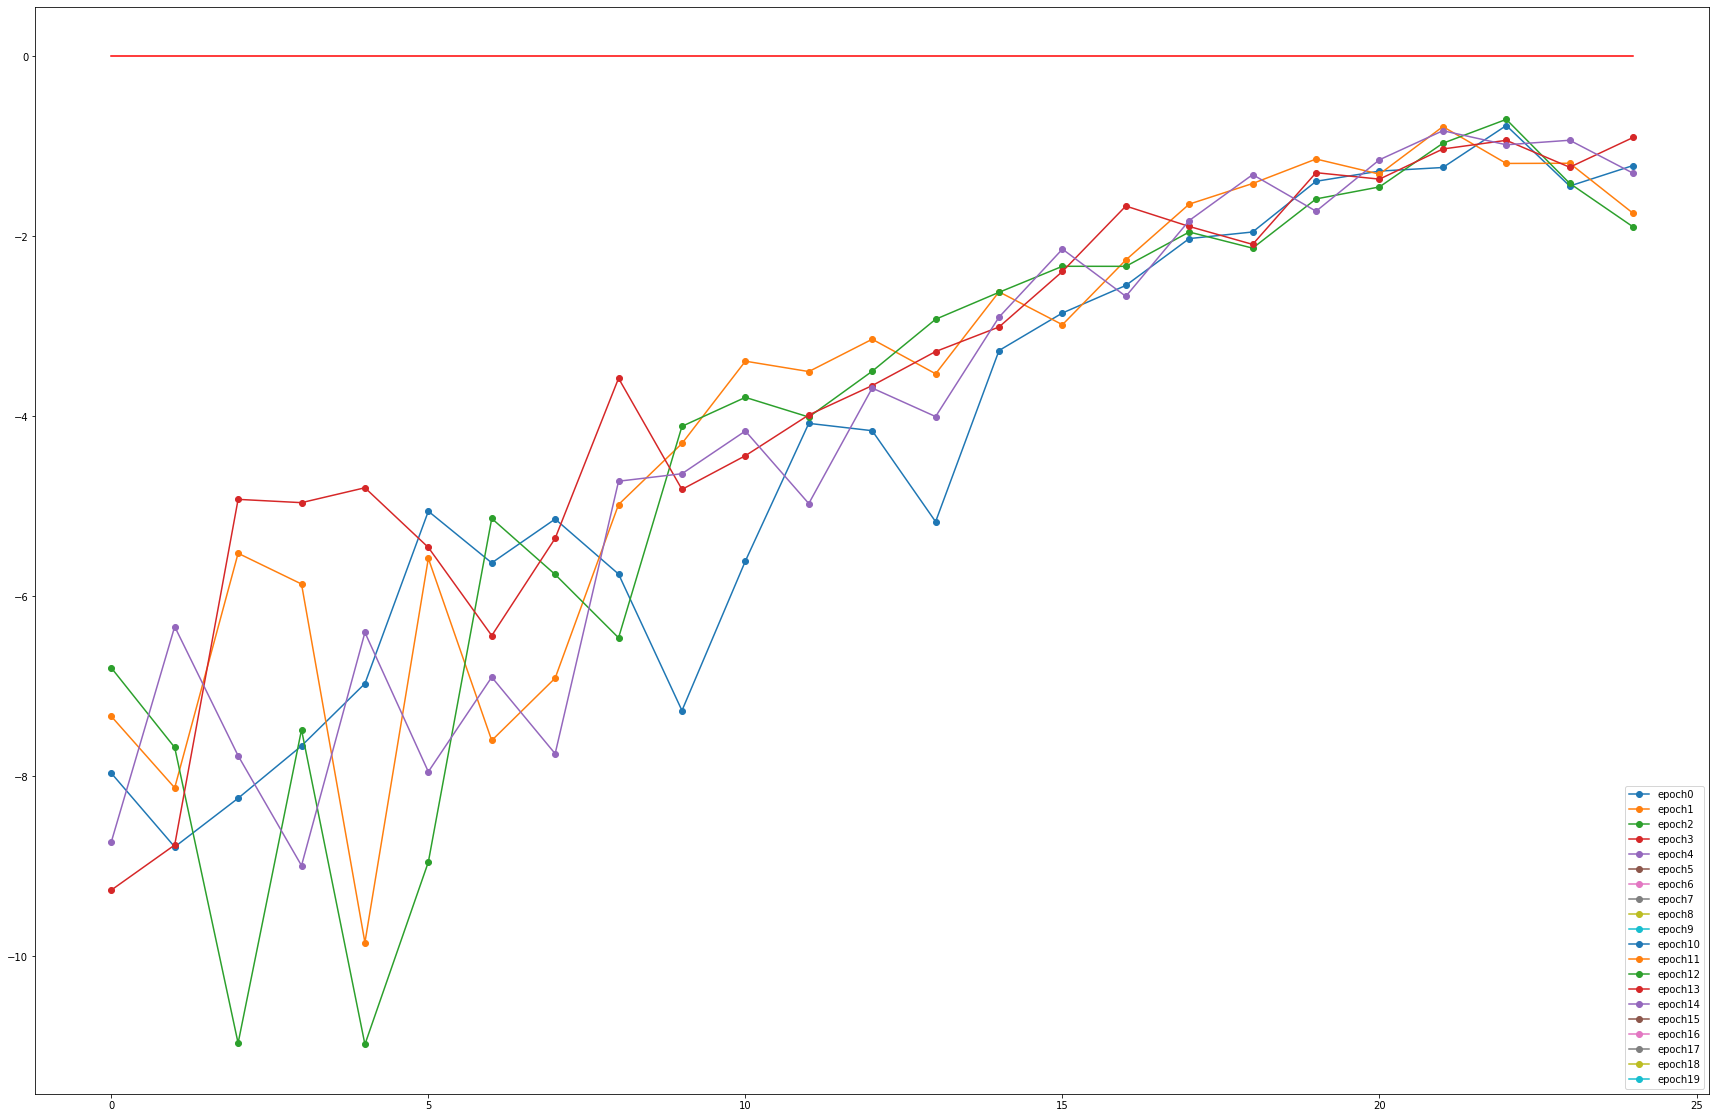

2:-xf2@


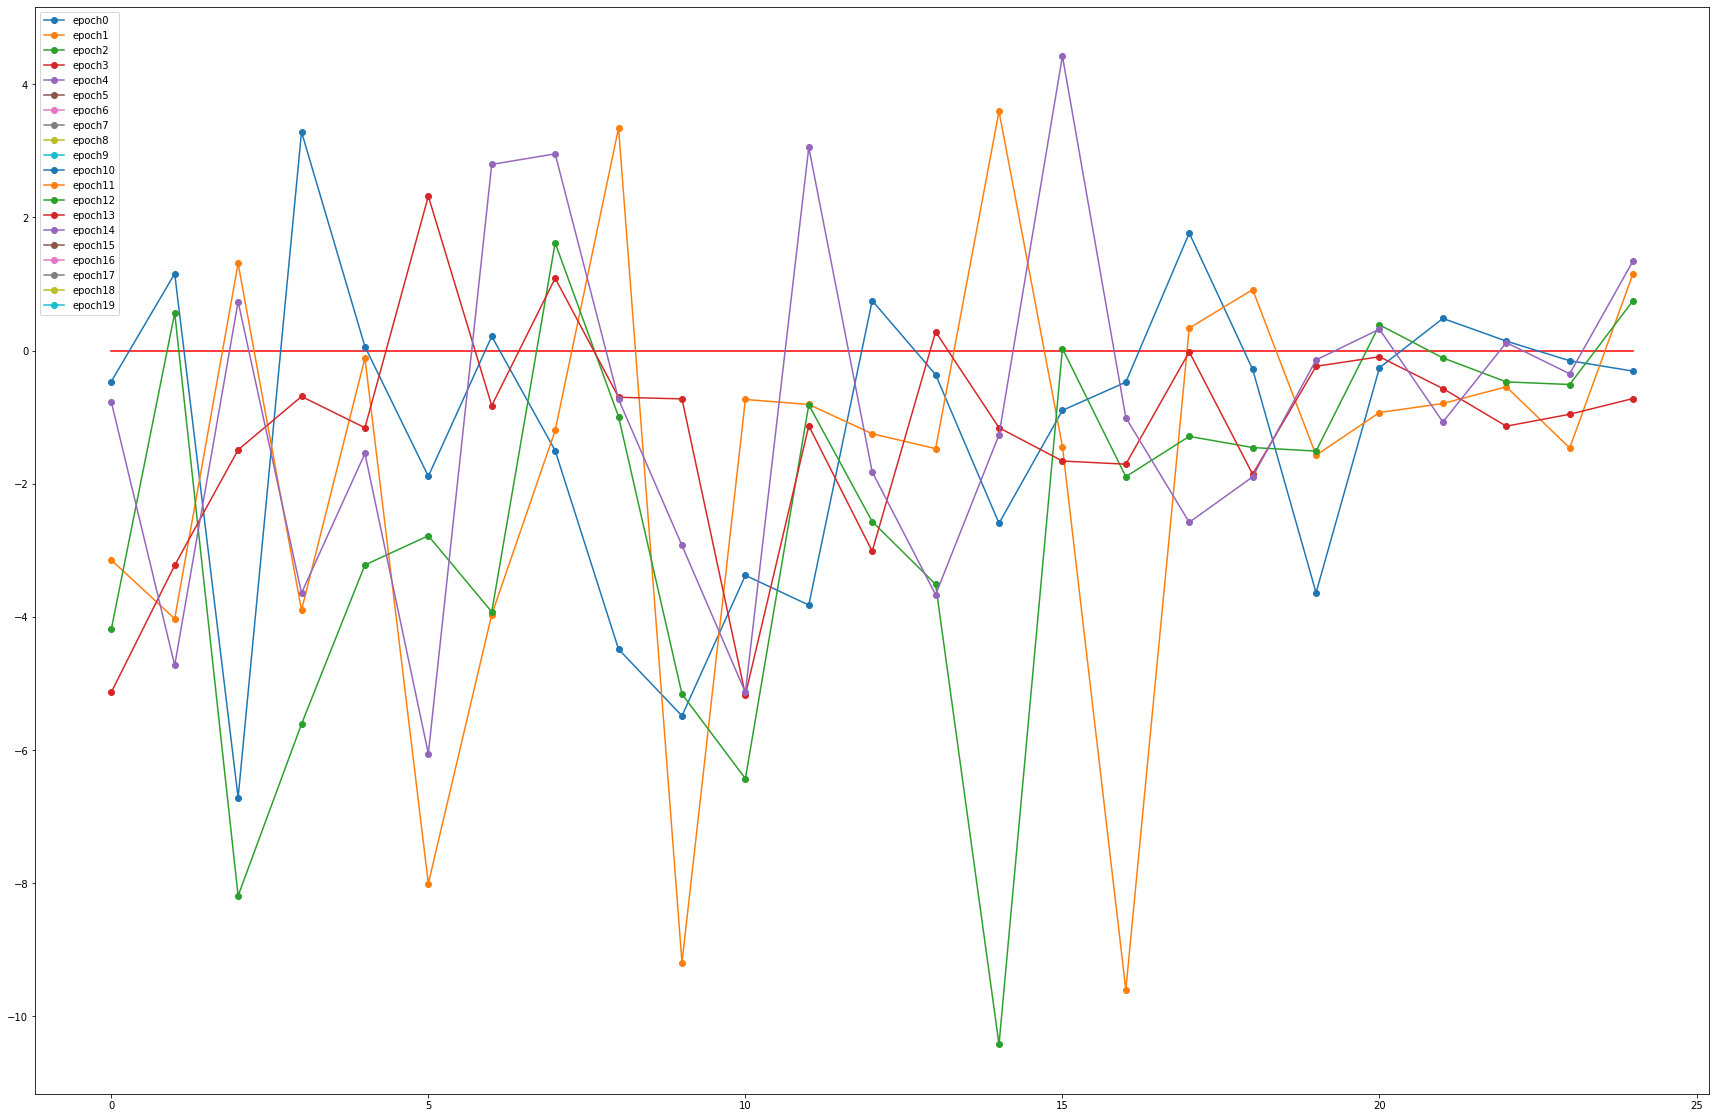

3:x@


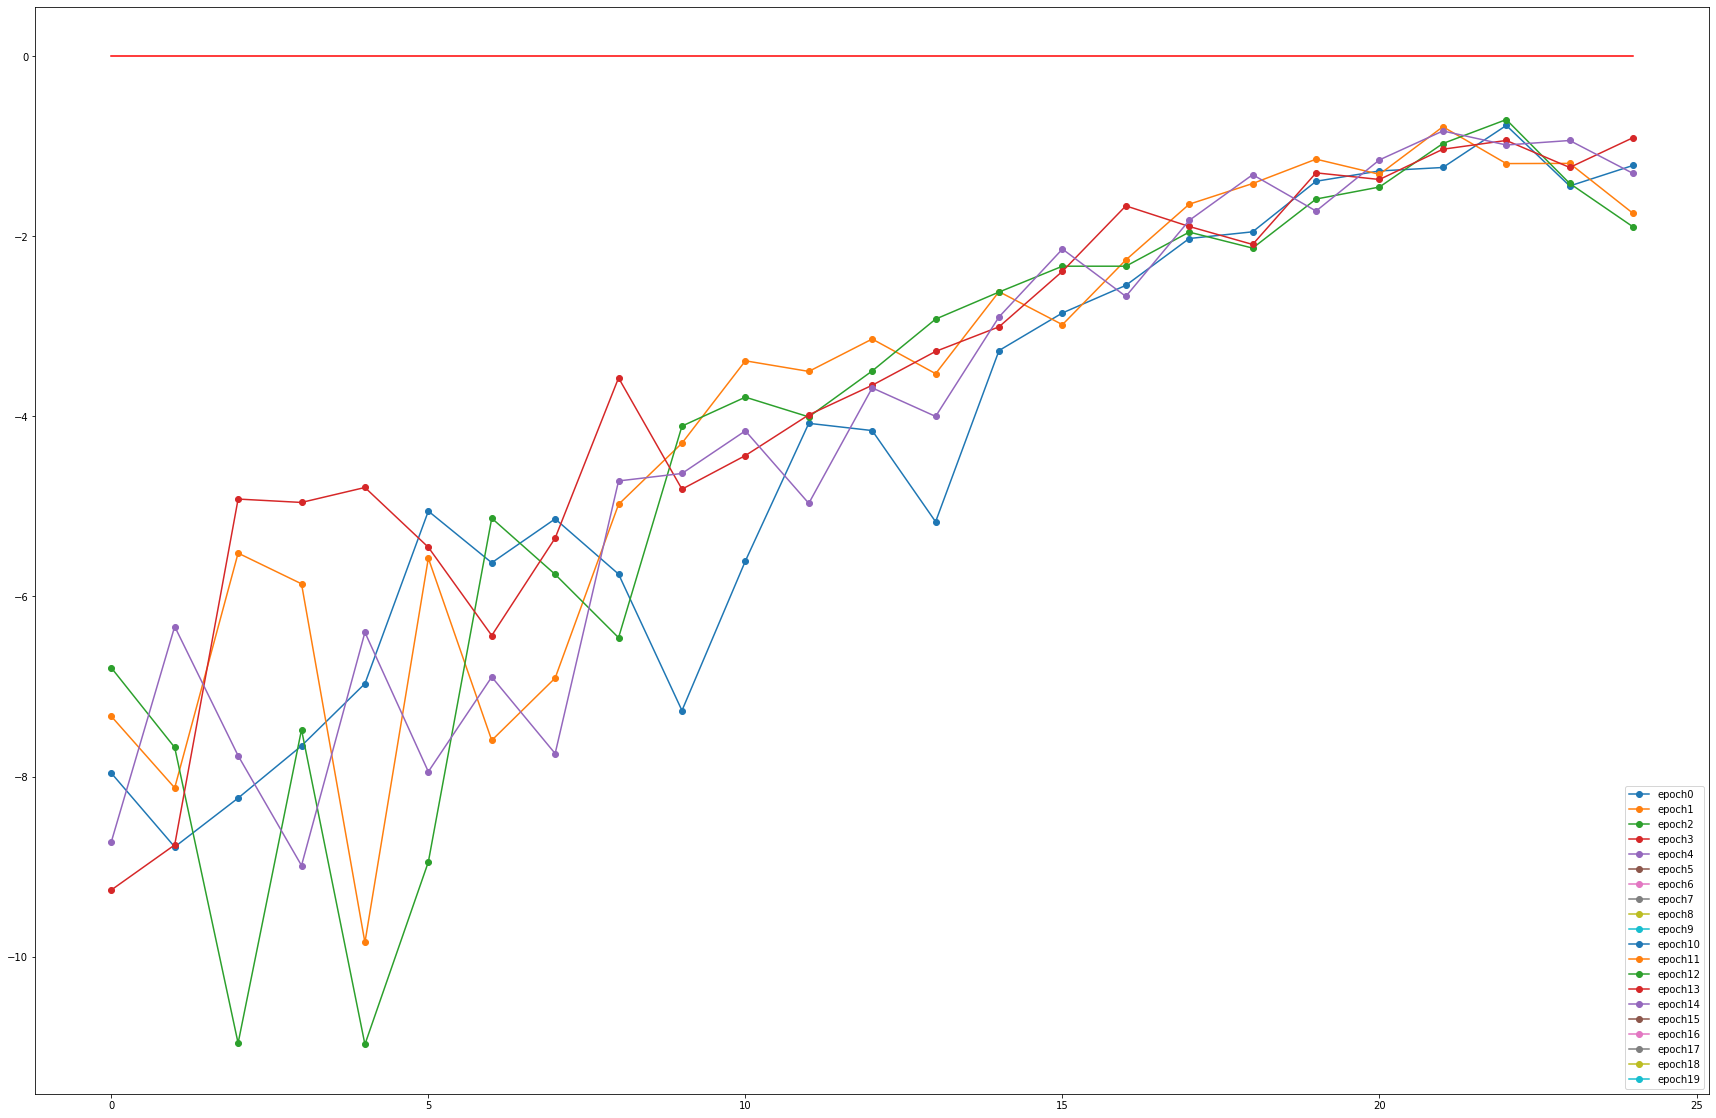

4:x2@


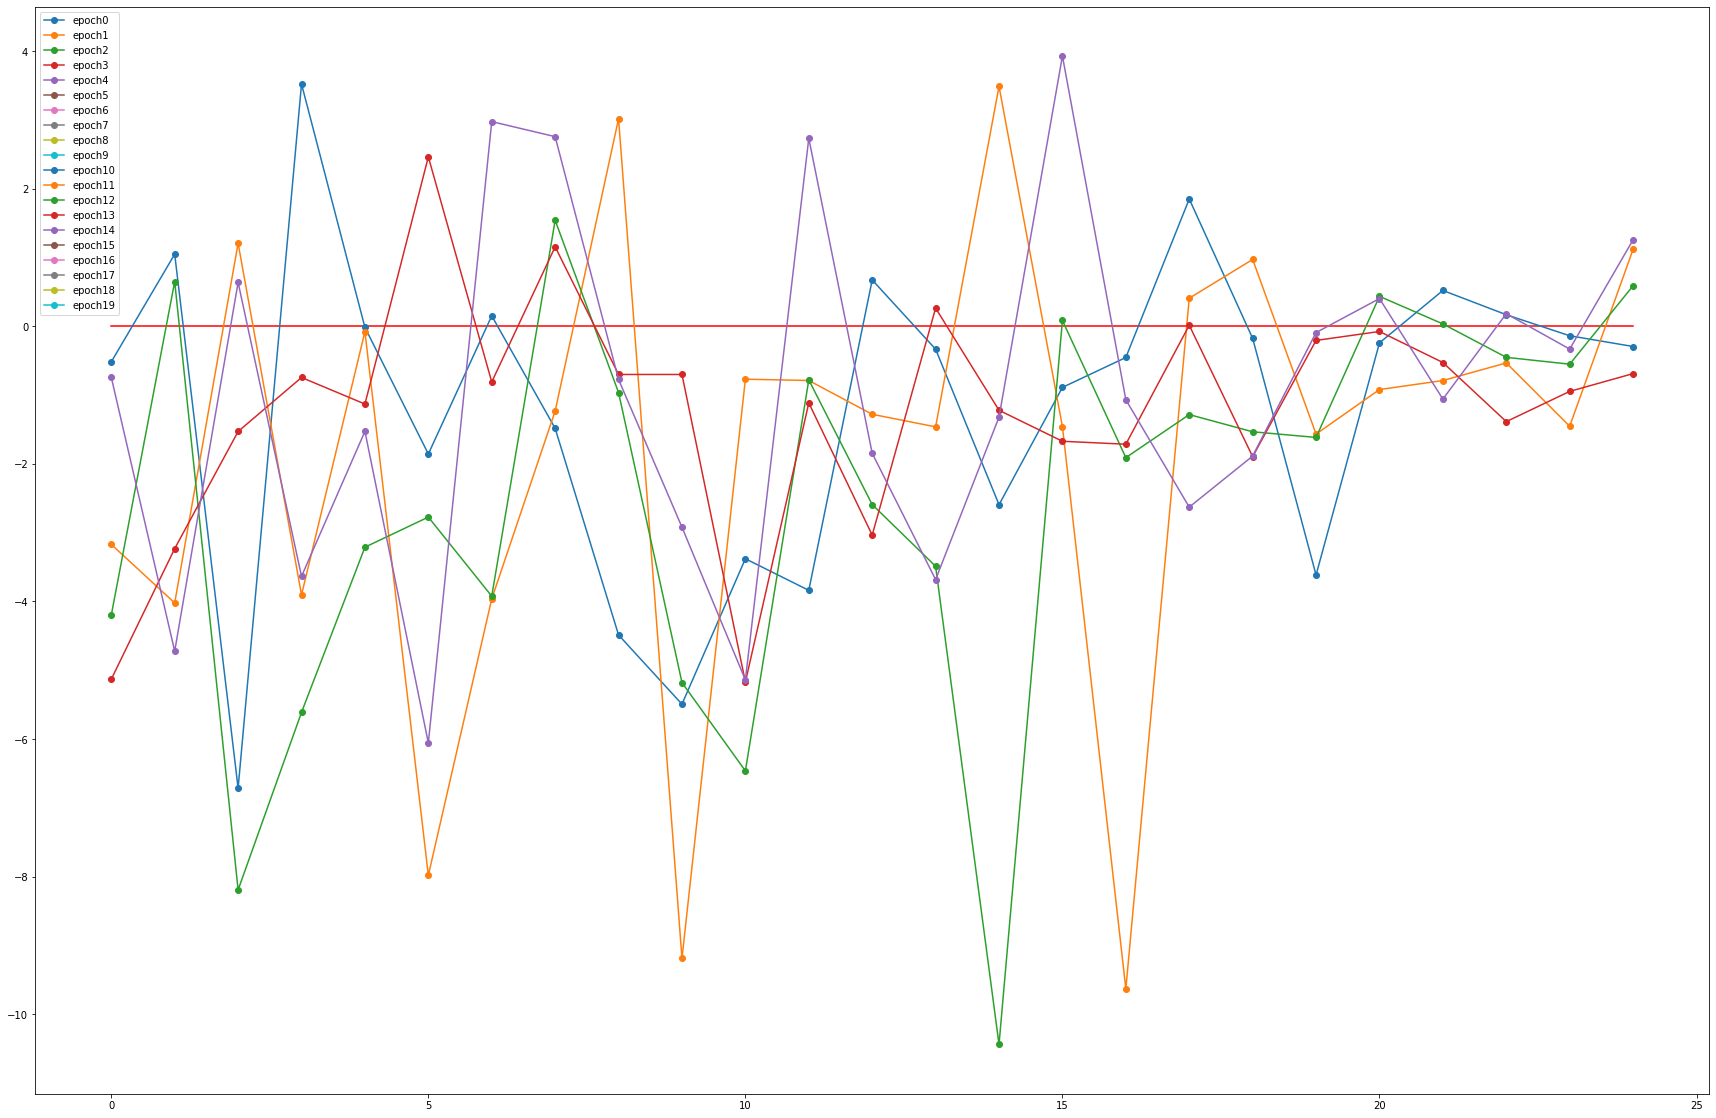

5:F


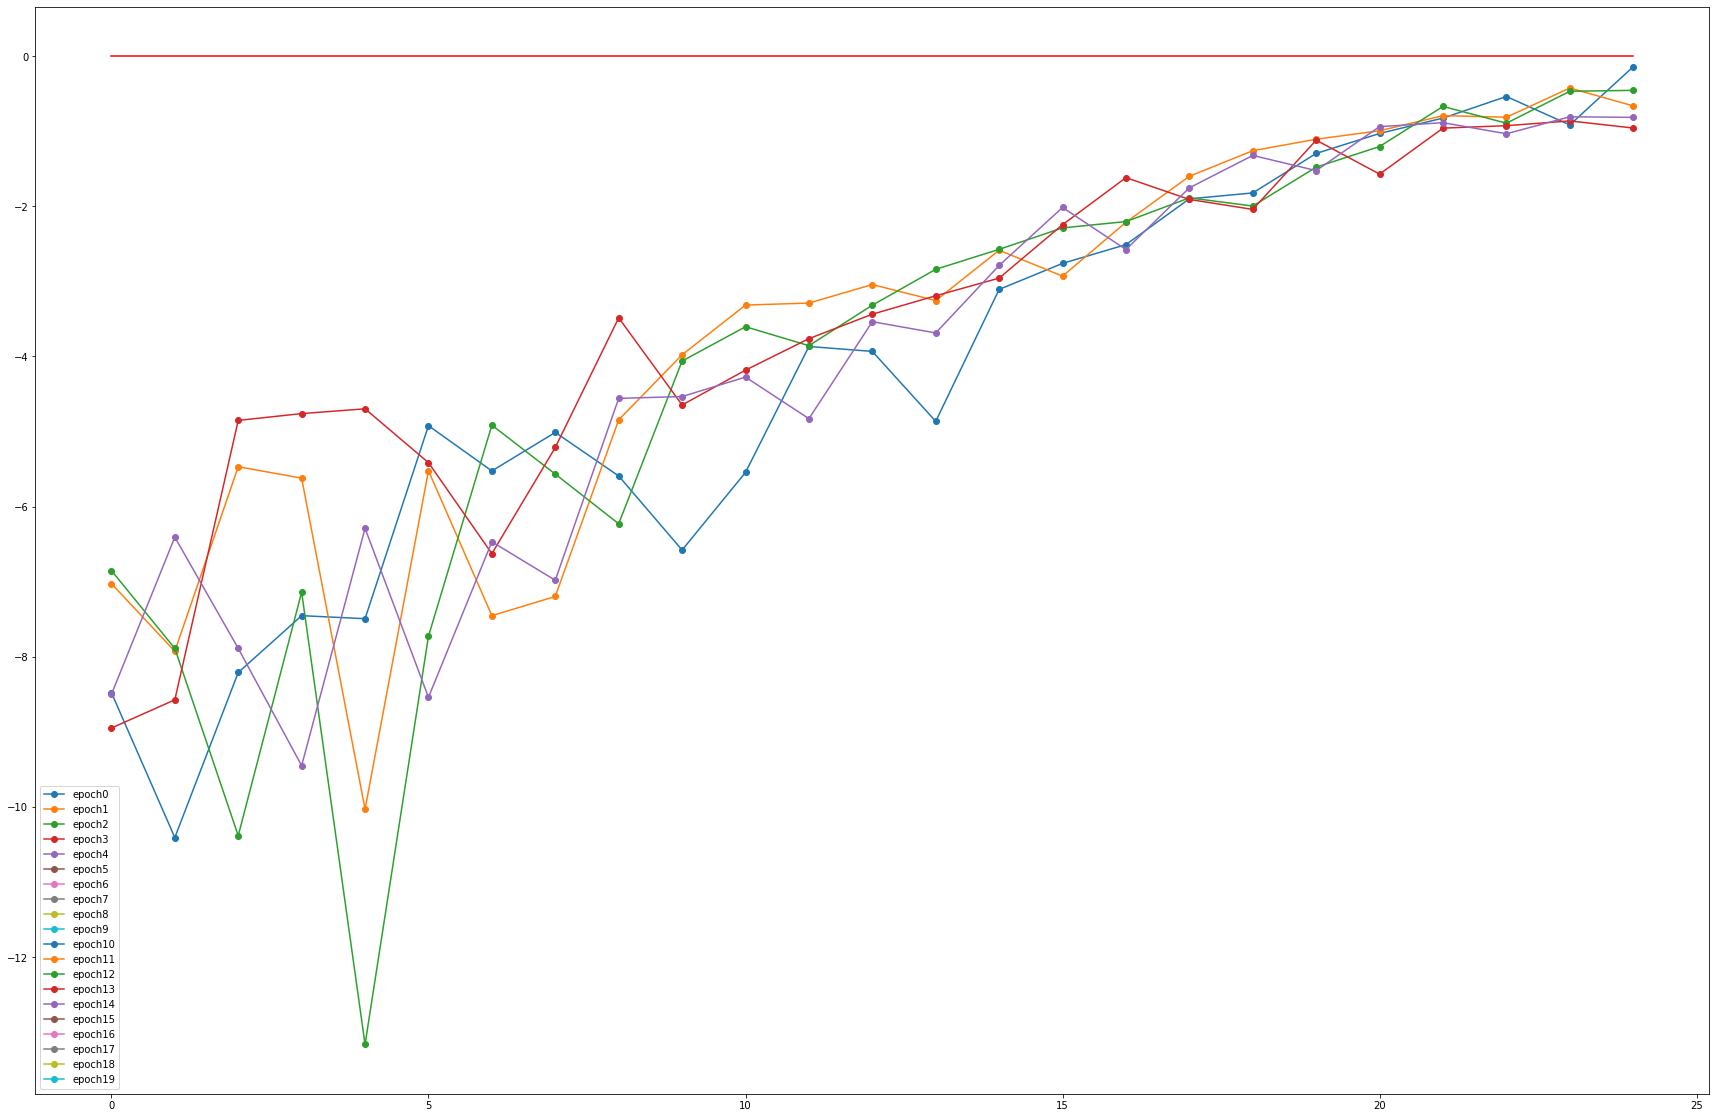

In [8]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhs."+str(i)]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

## A/B

0:tflatten(torch.ones(x.shape.cuda(


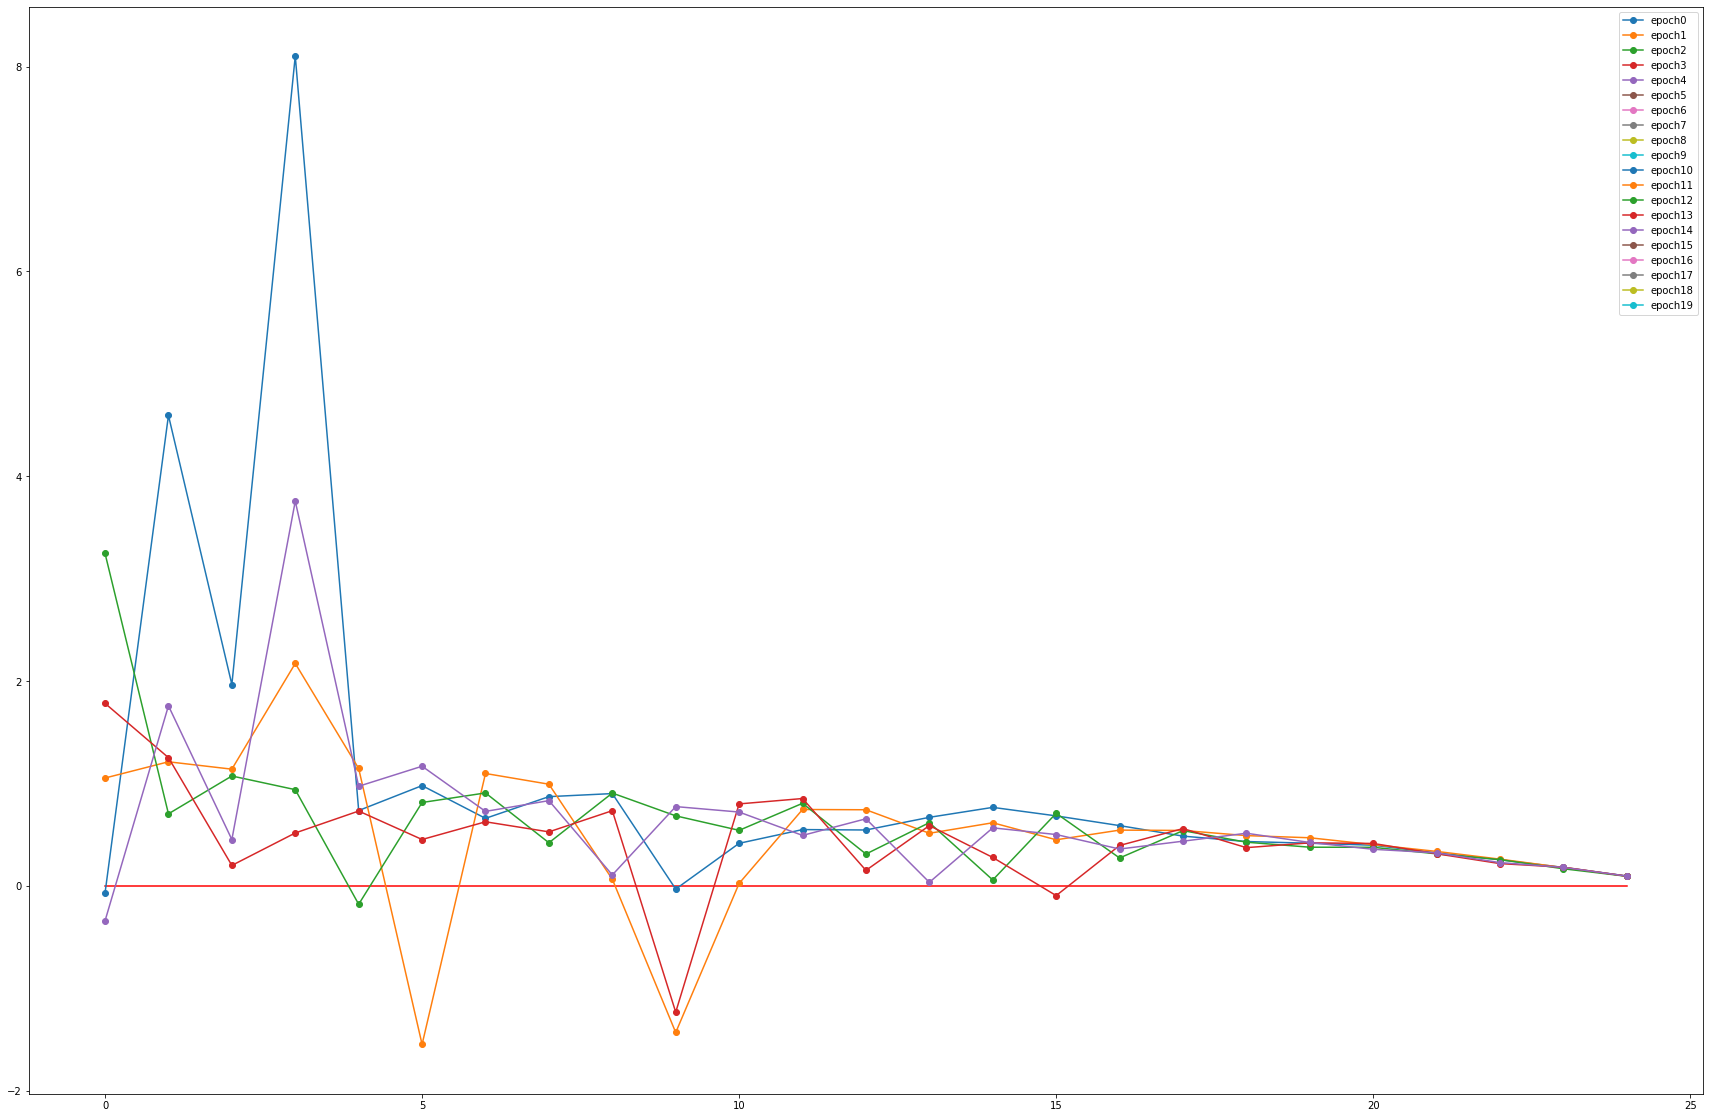

1:xf@


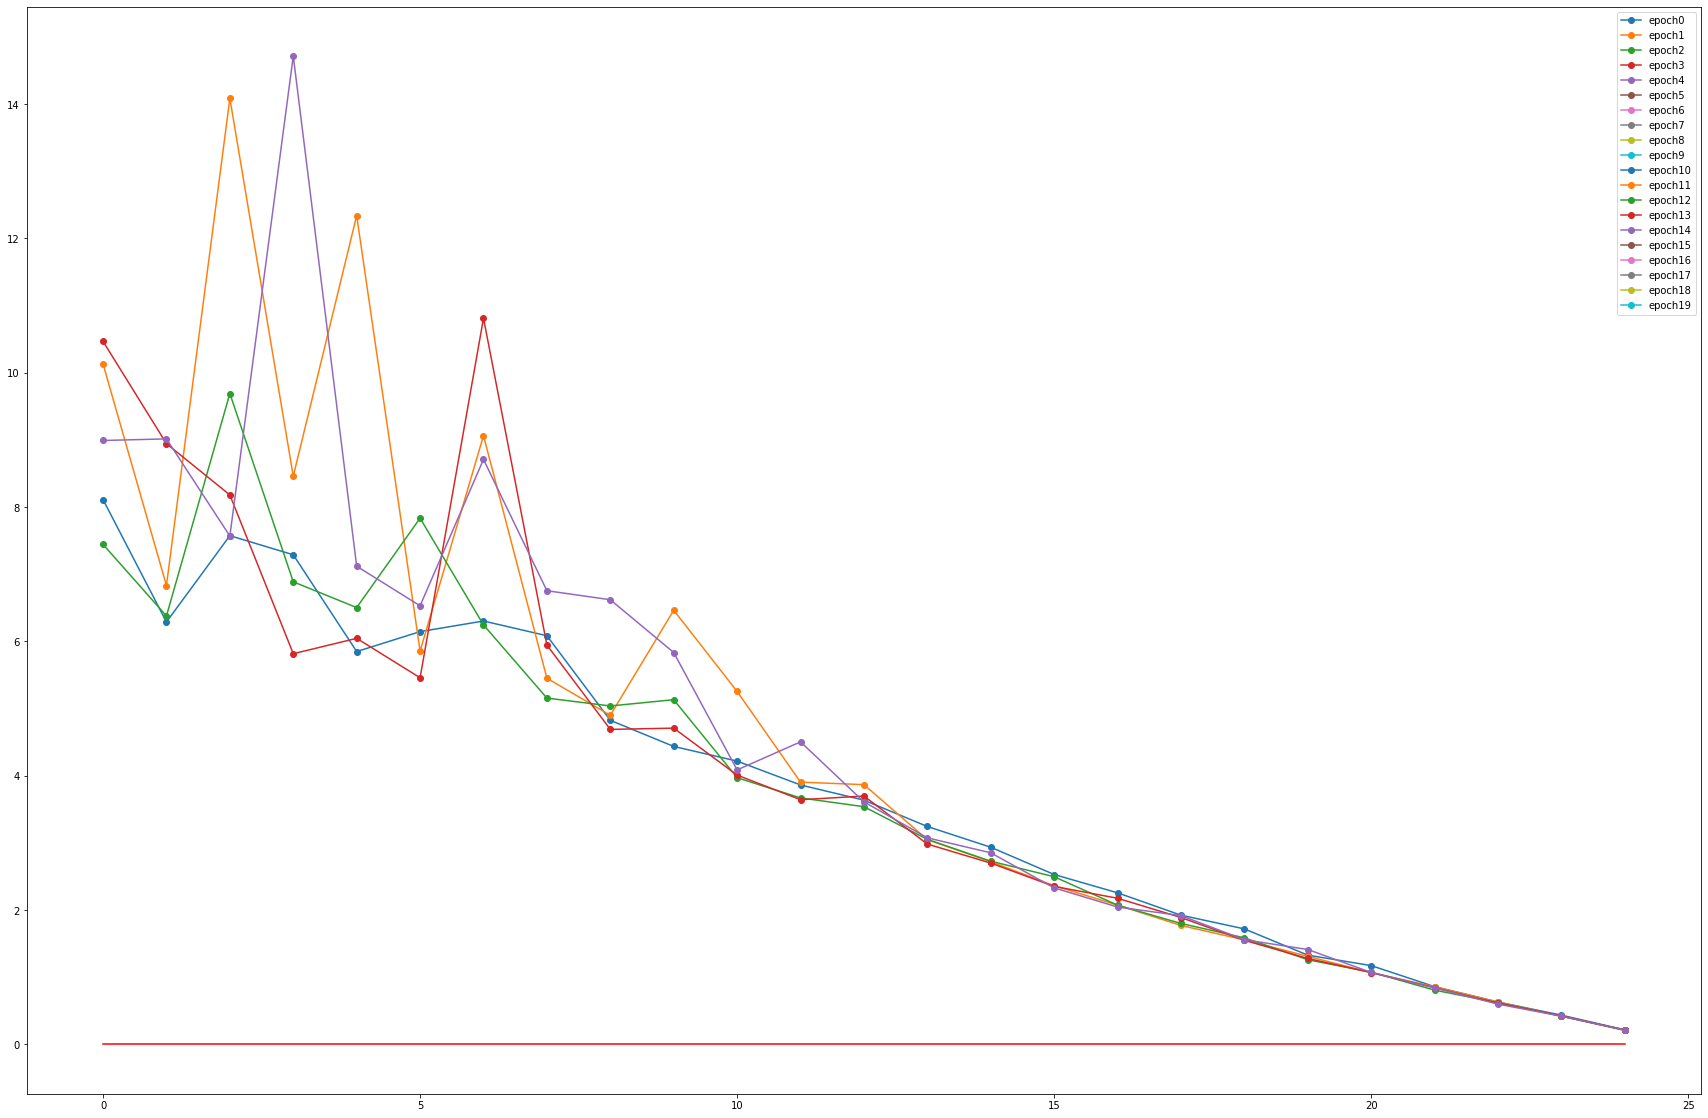

2:-xf2@


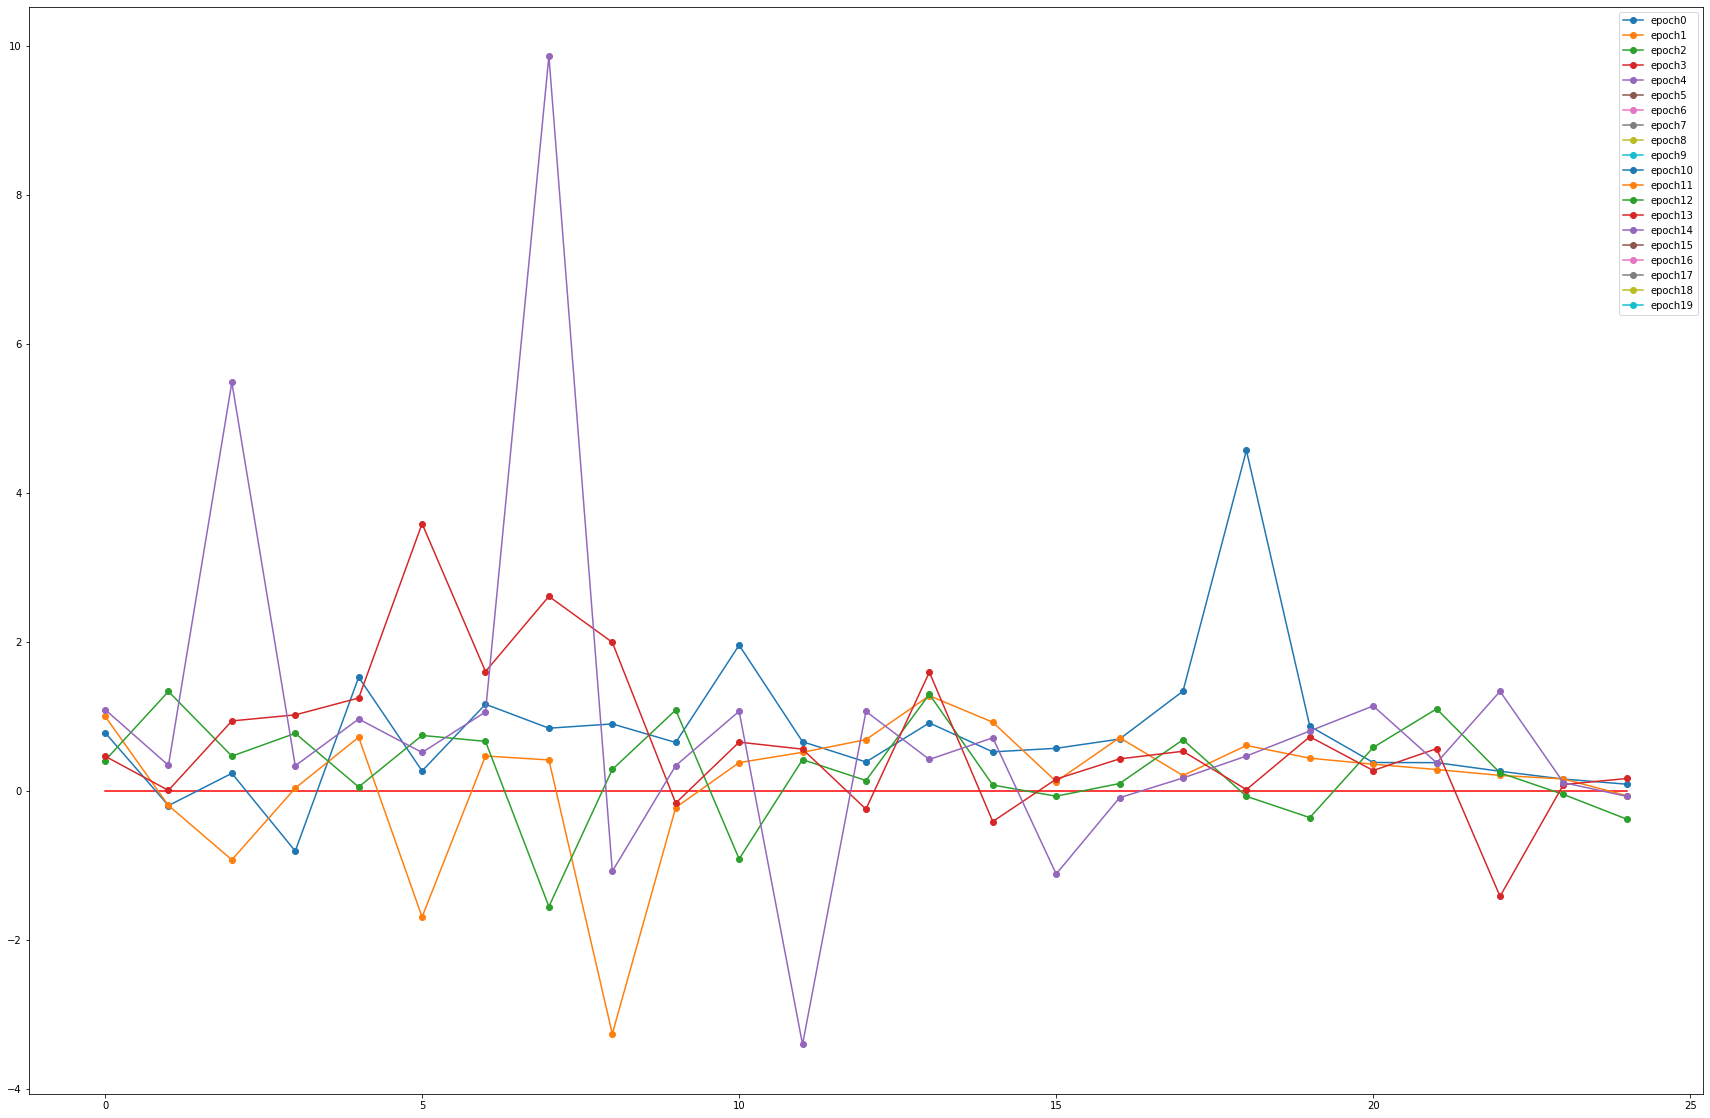

3:x@


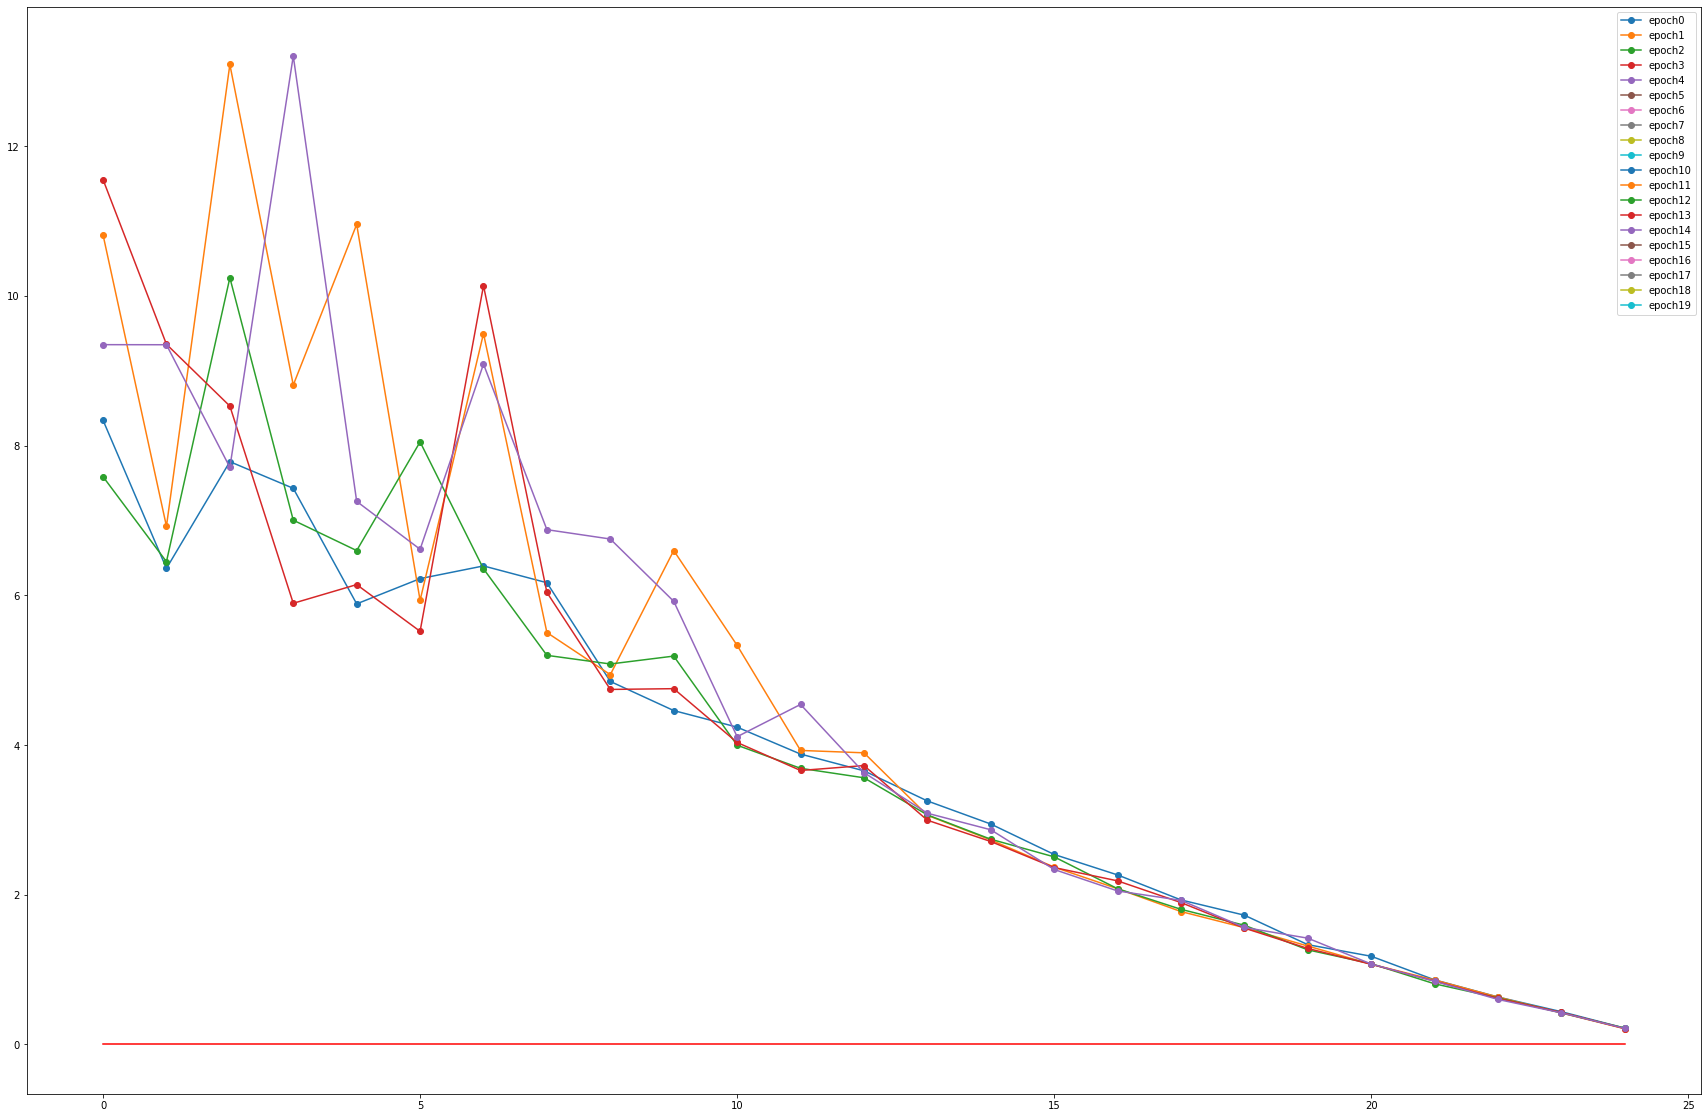

4:x2@


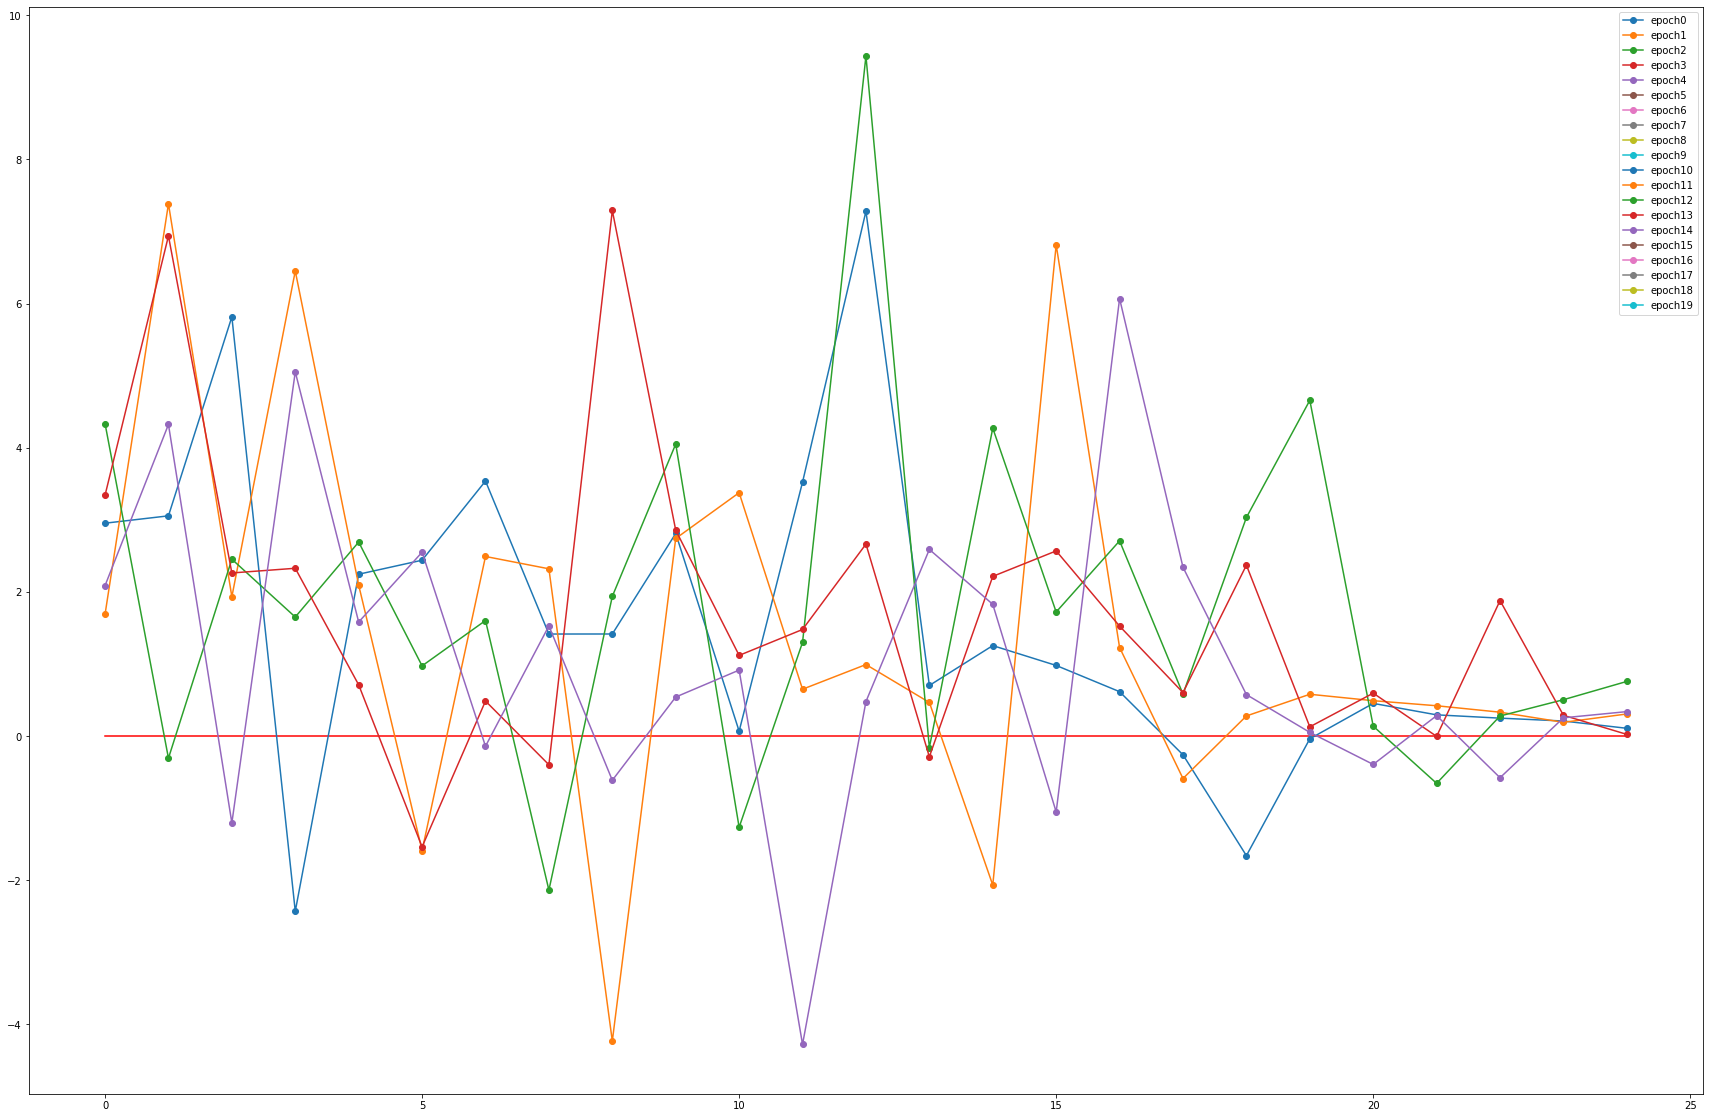

In [9]:
for i in range(5):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhsA(F)."+str(i)]/TUR_log["rhsB(df)."+str(i)],generate_num=generate_num)
    plt.show()